In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display all columns
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import Houseprice data from GitHub
df = pd.read_csv('https://github.com/jurand71/datasets/raw/master/HouseSalePriceCompetition/houseprice.csv')

In [2]:
# Determine numerical and positive variables and other than 'Id'
variables = []

for var in df.columns:
    
    if var not in ["Id","SalePrice"] and df[var].dtypes != "O":
        if np.sum(np.where(df[var] <= 0, 1, 0)) == 0:
            variables.append(var)

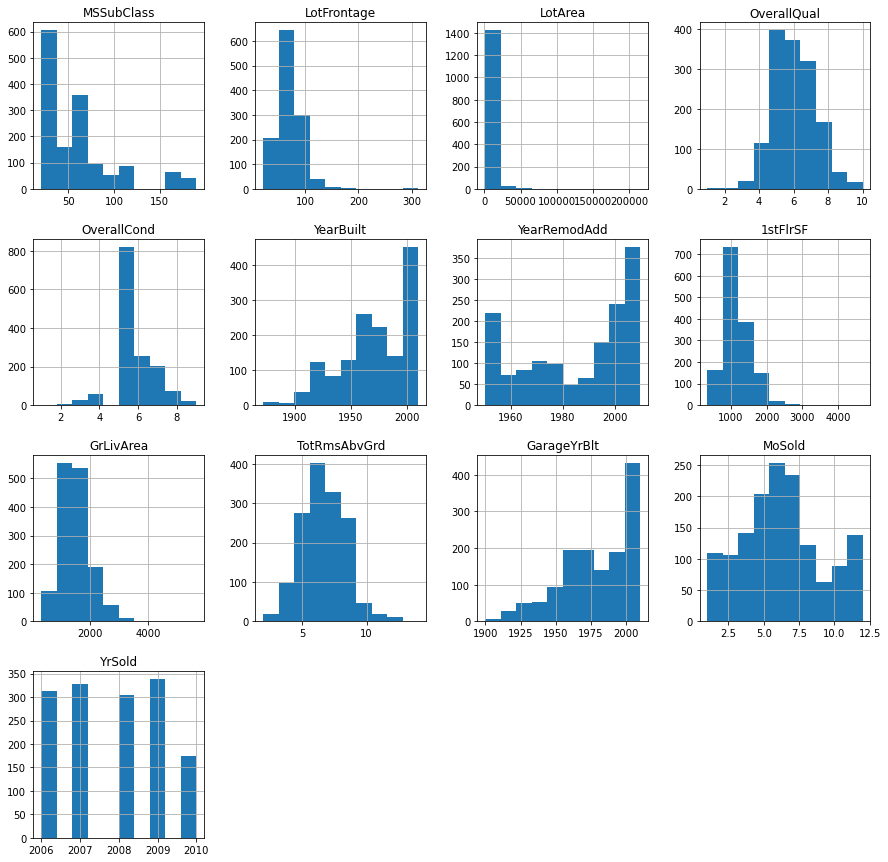

In [3]:
# Explore the distribution of selected variables

df[variables].hist(figsize=(15,15))
plt.show()

In [4]:
# Function for Gaussian distribution
import seaborn as sns
import scipy.stats as stats

sns.set_theme()

def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

In [5]:
# Import FunctionTransformer and PowerTransformer classes

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

### Transformacja odwrotna

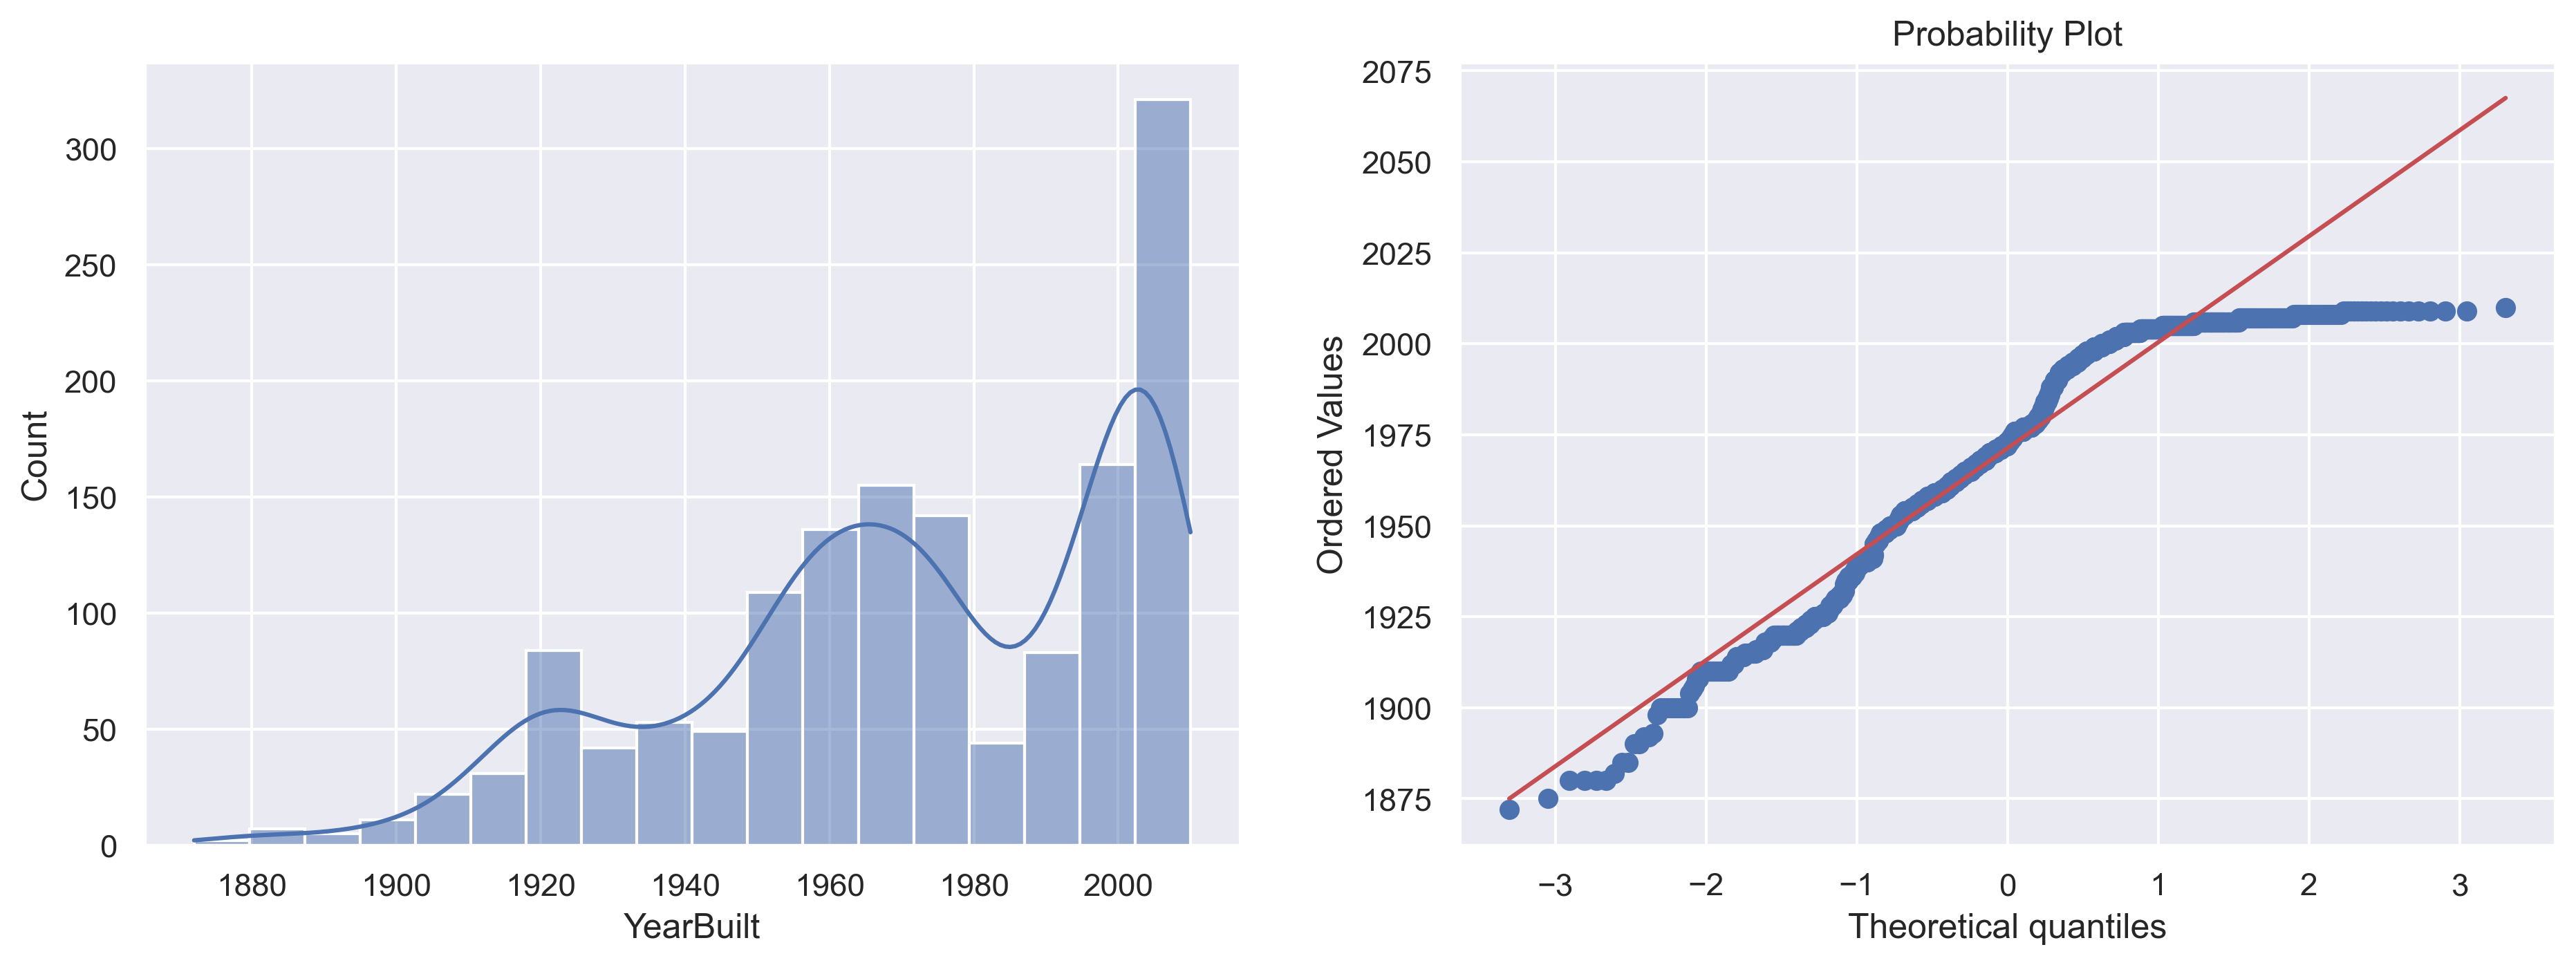

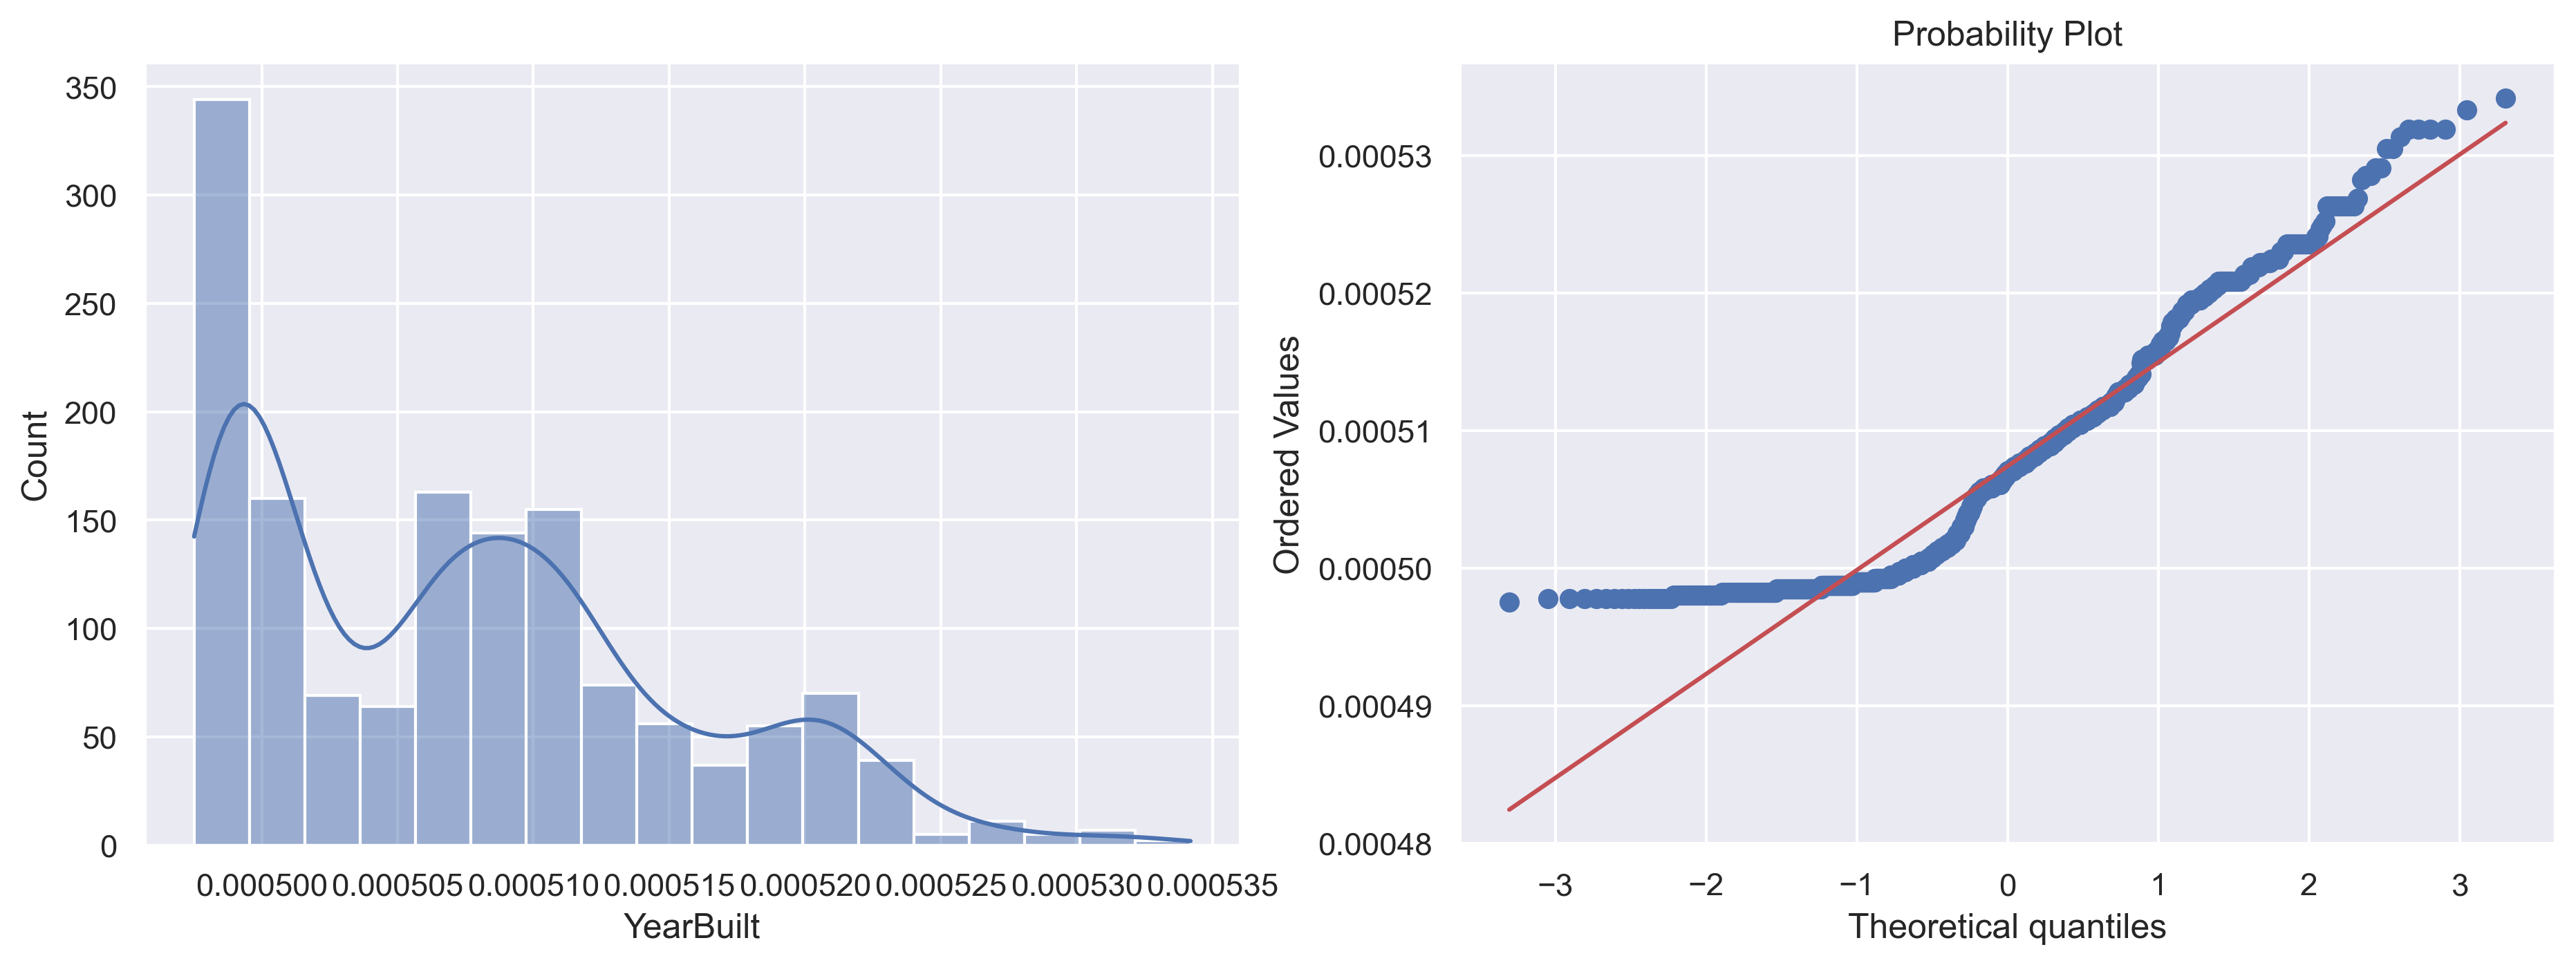

In [6]:
transformer = FunctionTransformer(lambda x: 1/x, validate=True)
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

### Transformacja pierwiastkowa

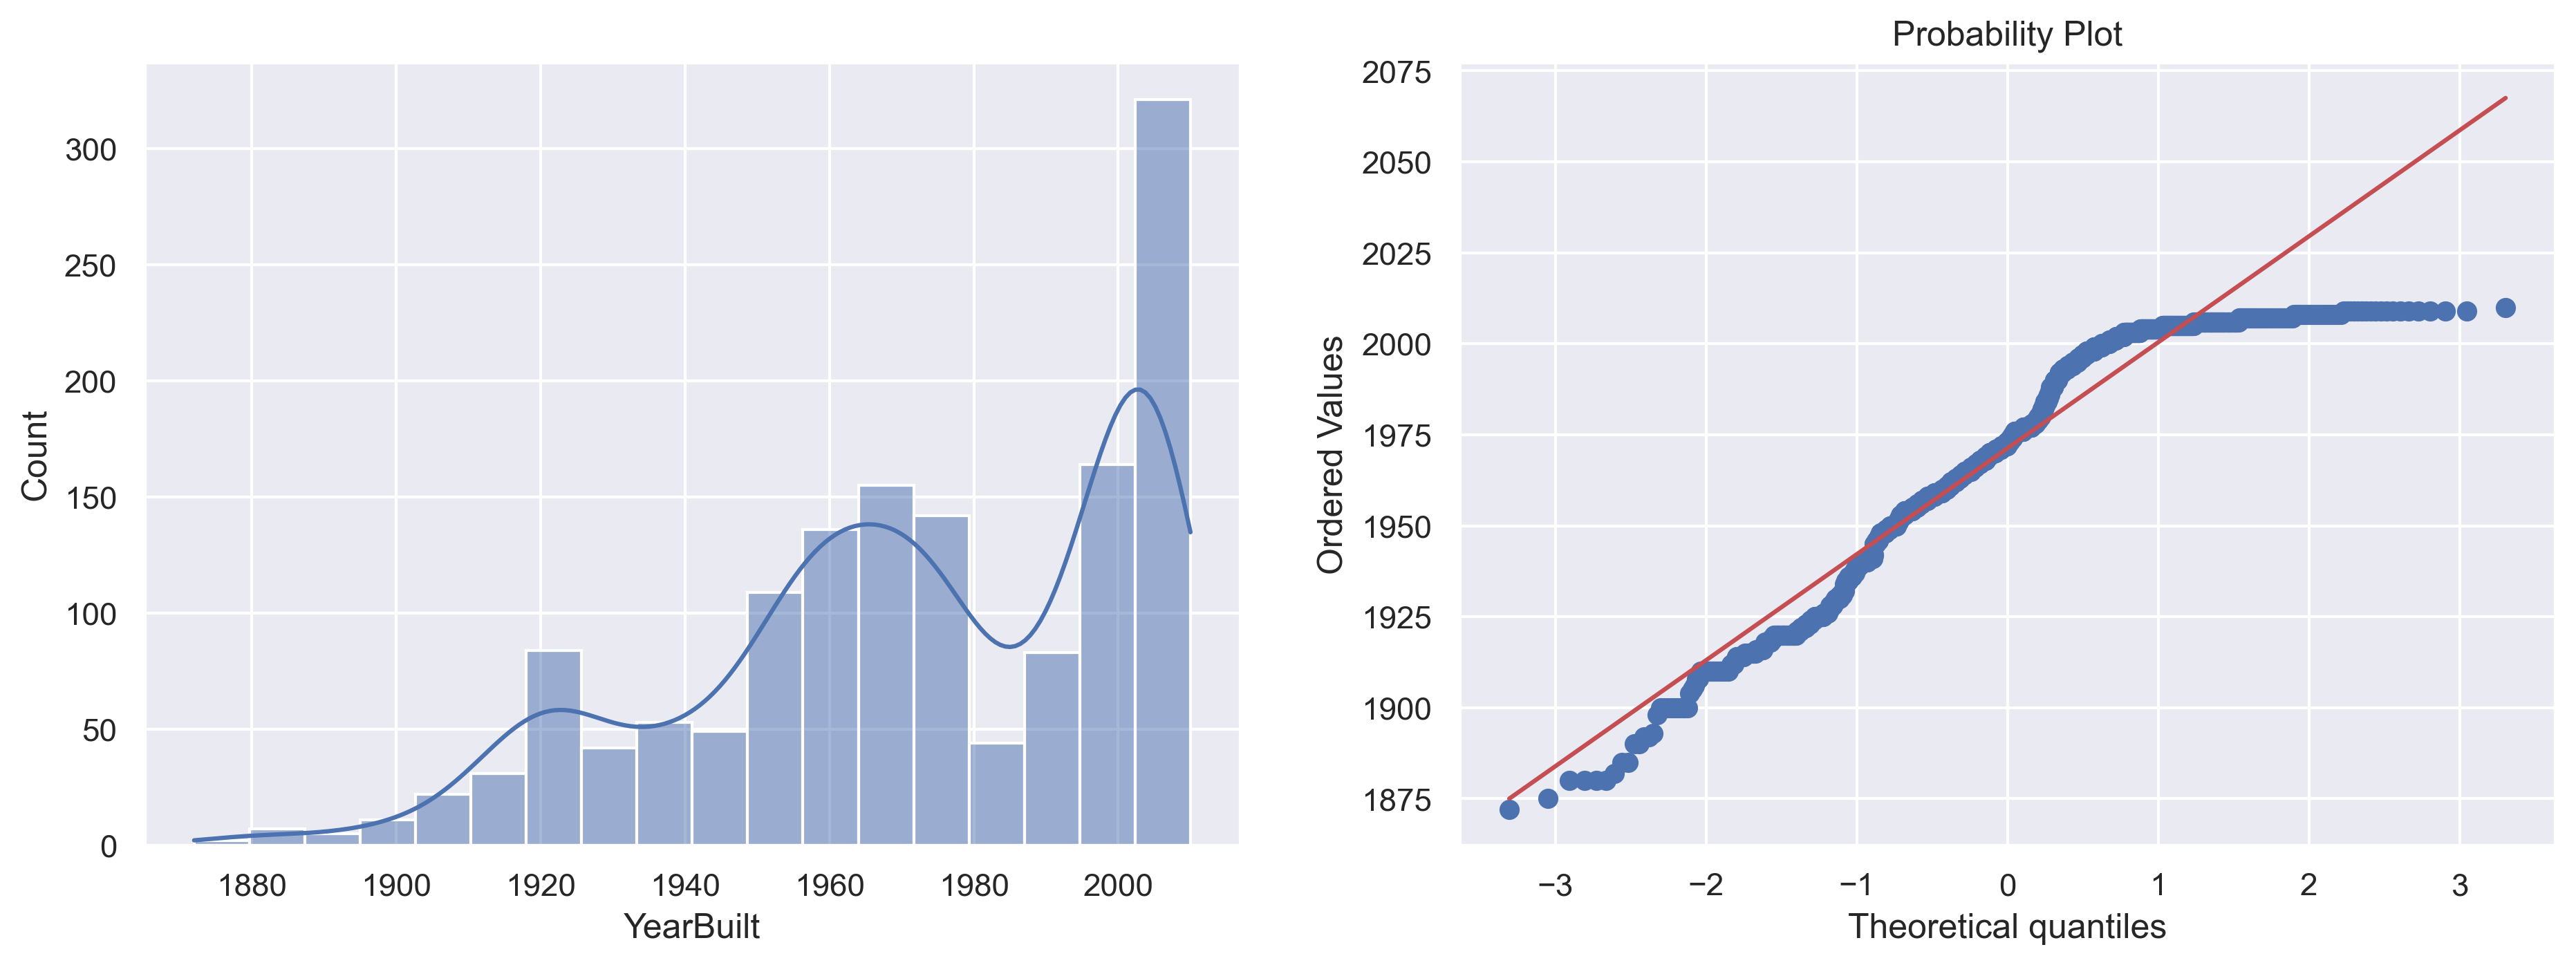

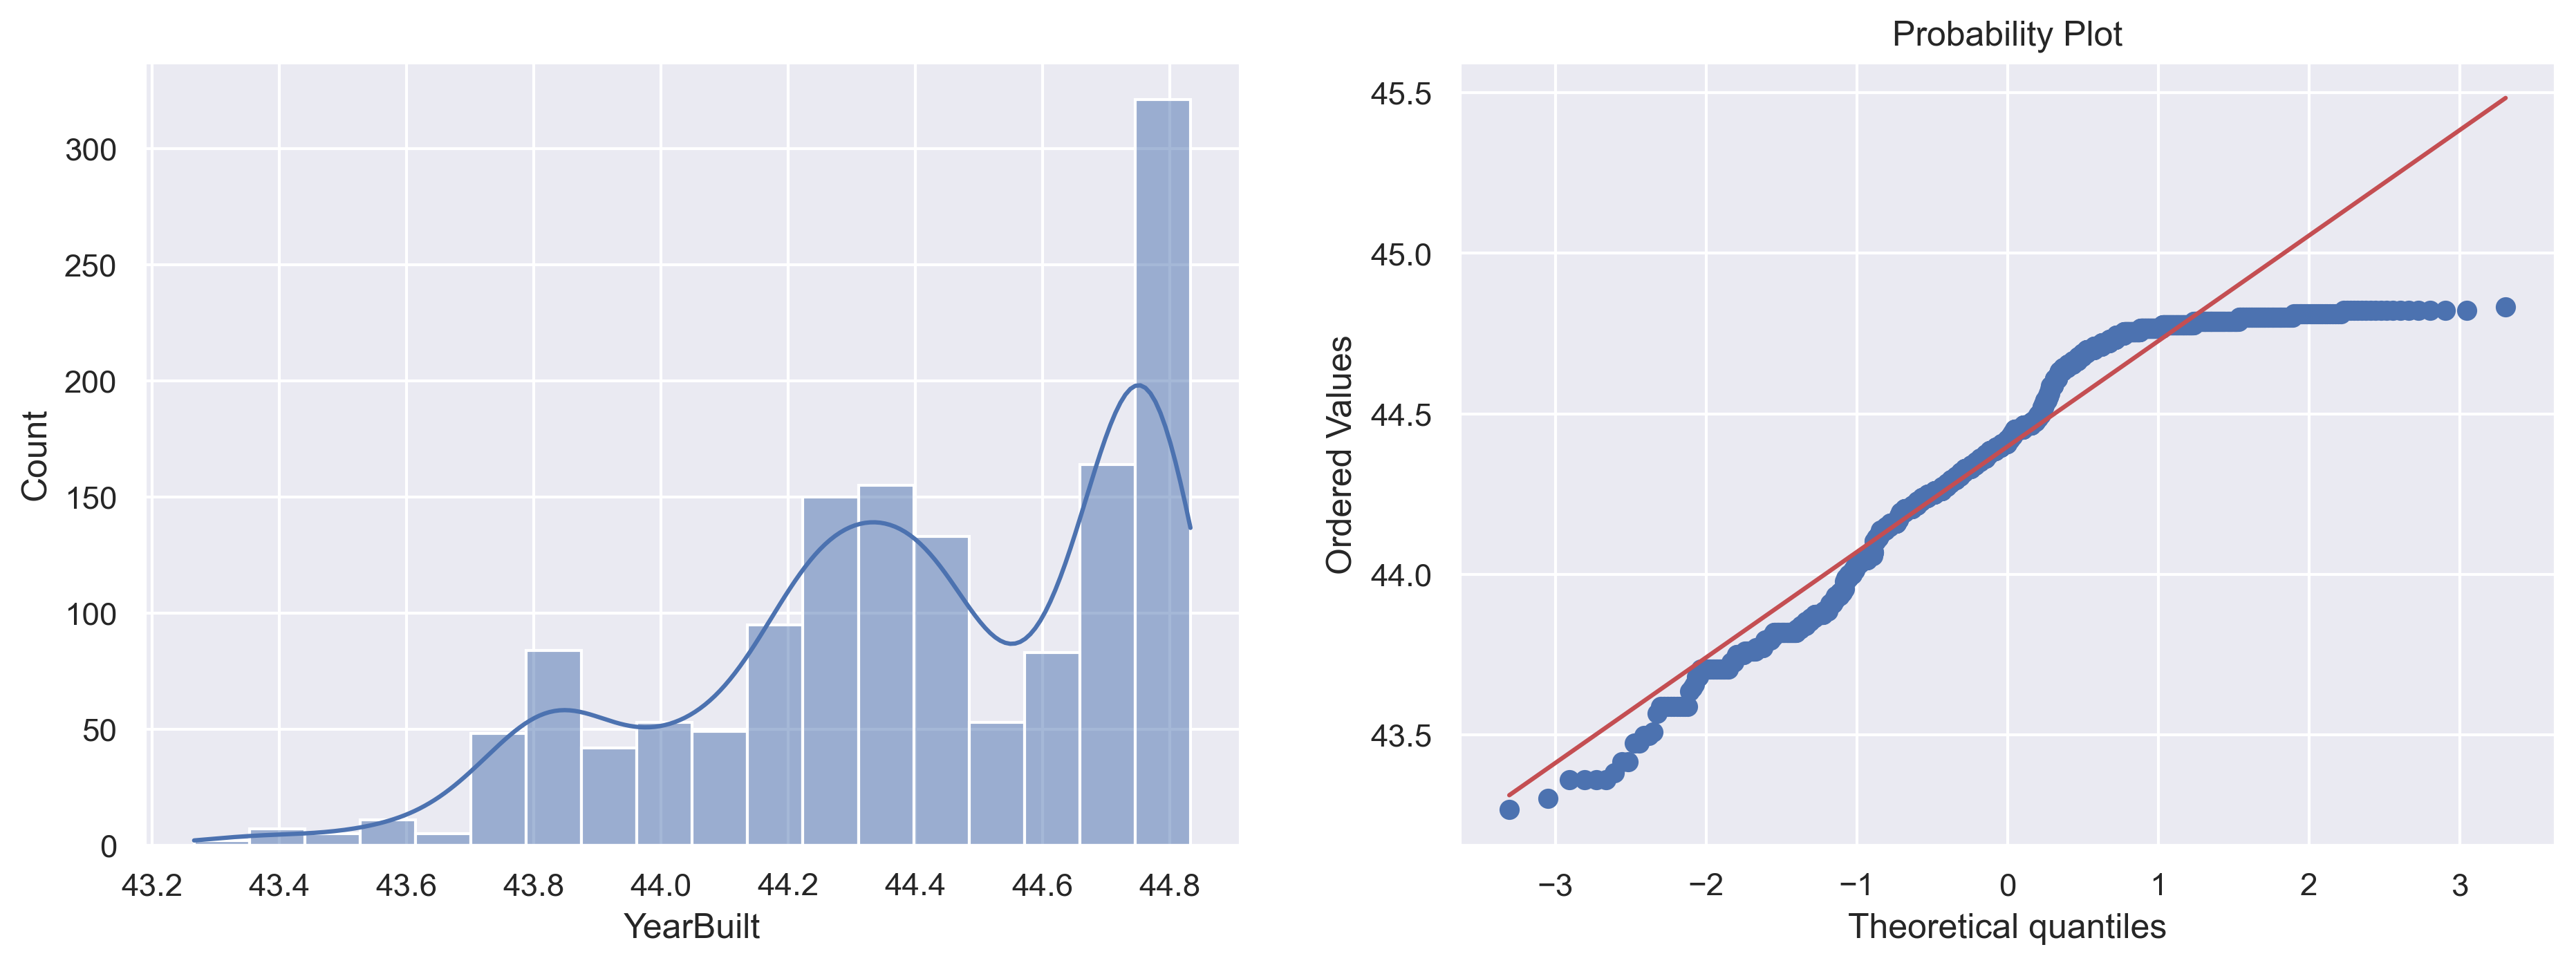

In [7]:
transformer = FunctionTransformer(lambda x: x**(1/2), validate=True)
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

### Transformacja wykładnicza

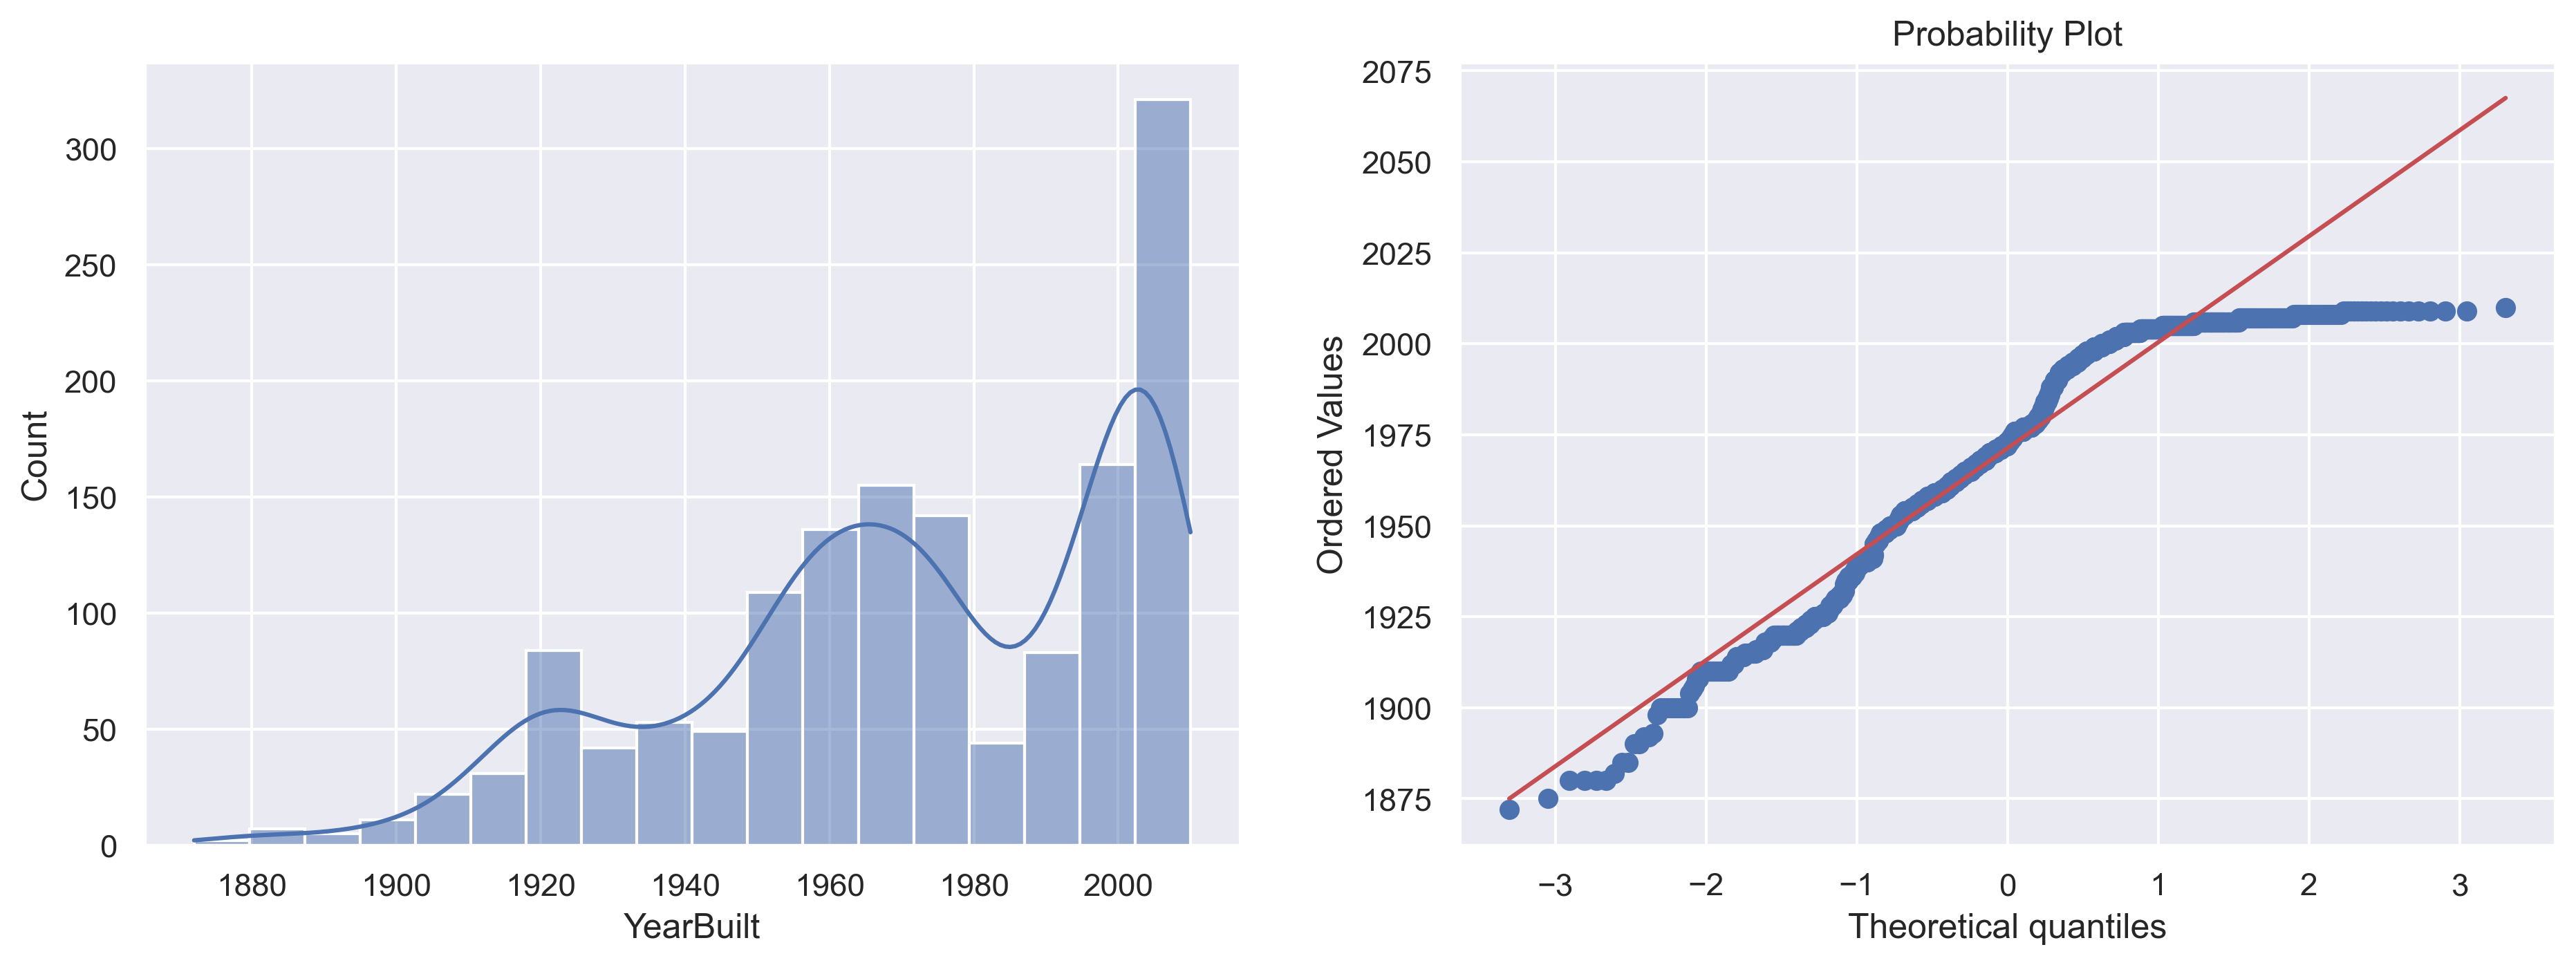

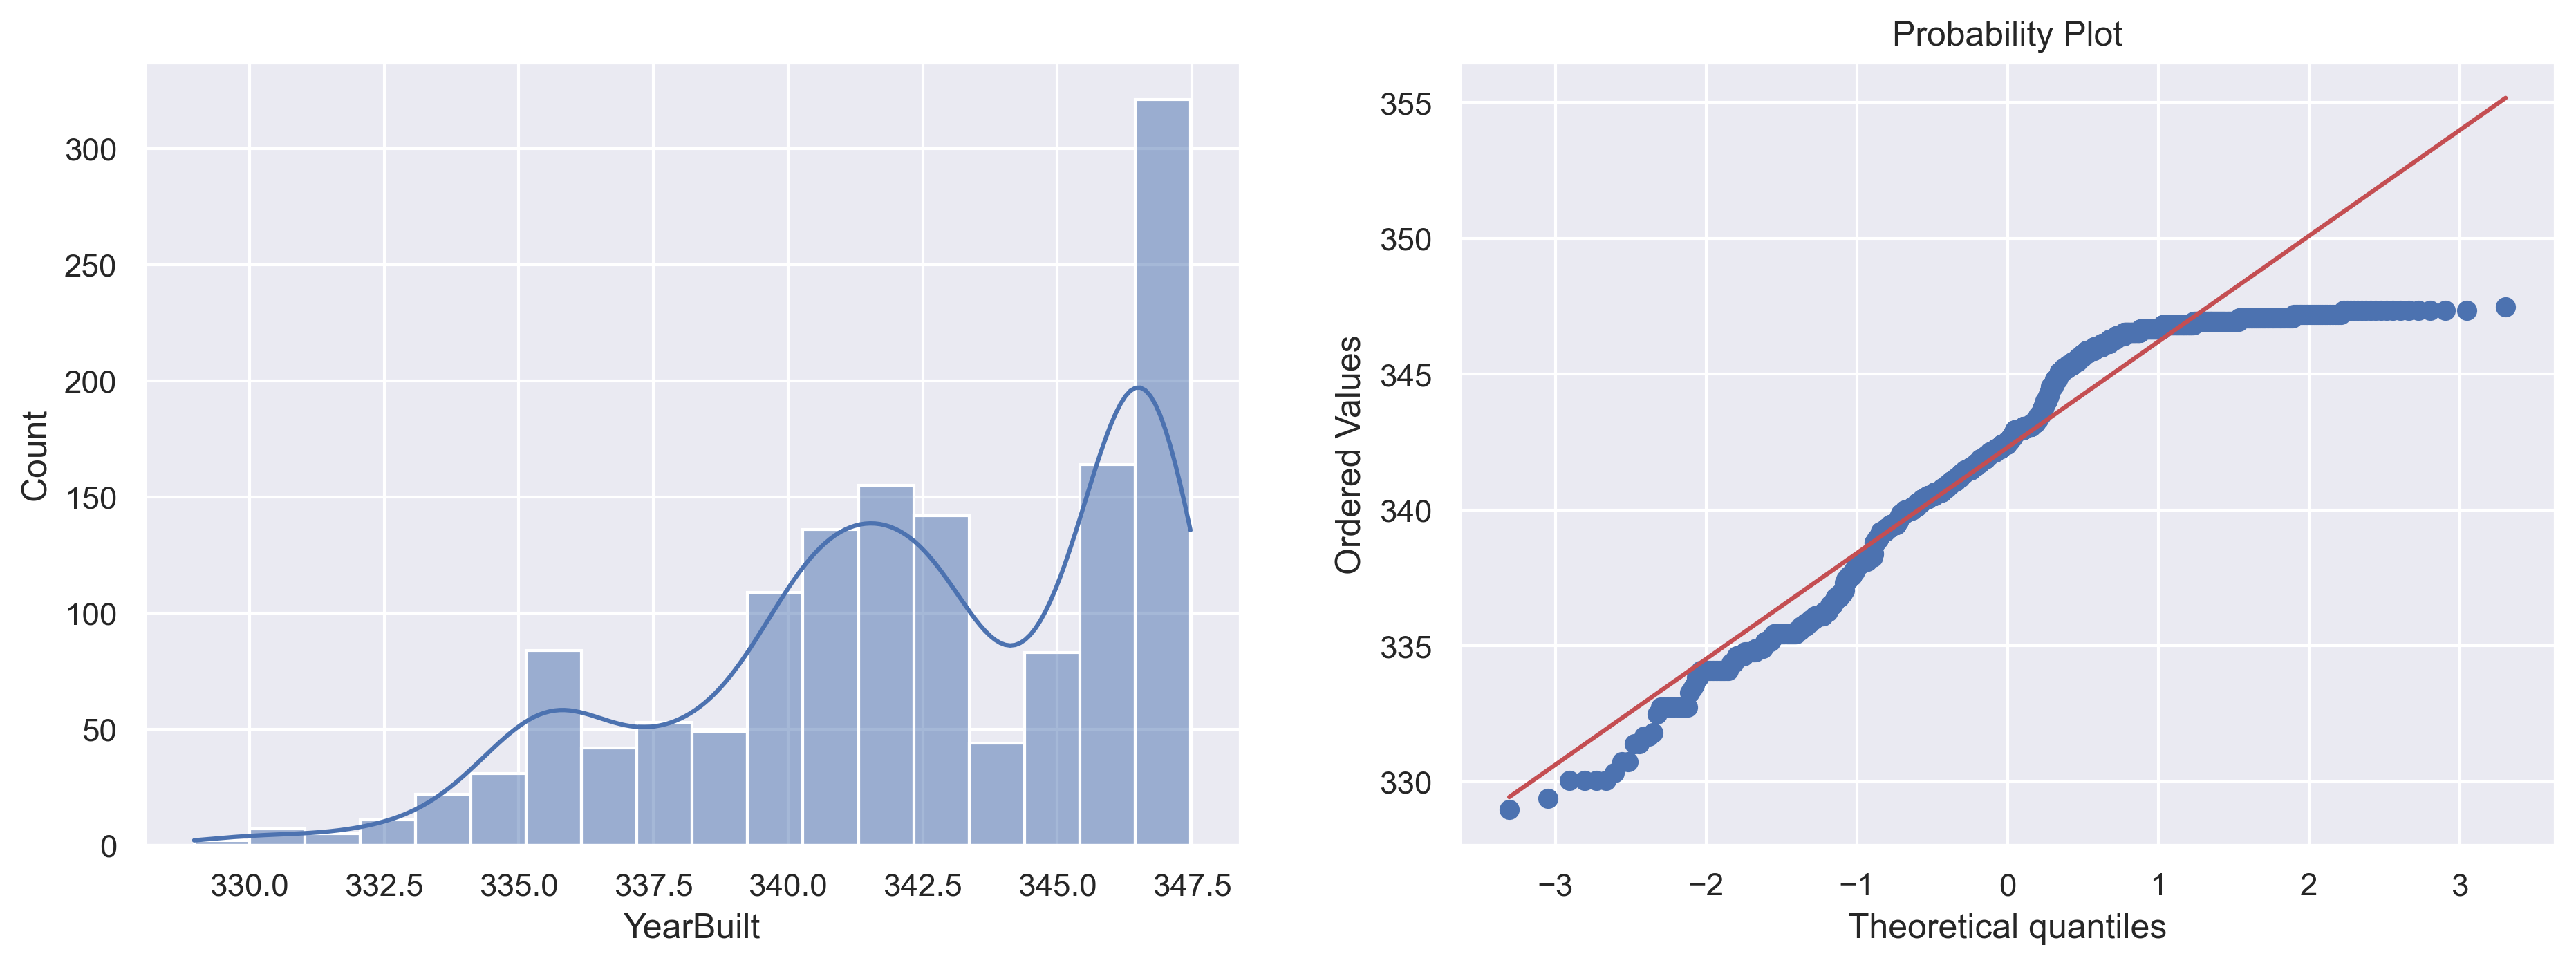

In [8]:
transformer = FunctionTransformer(lambda x: x**(1/1.3), validate=True)
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

### Transformacja logarytmiczna

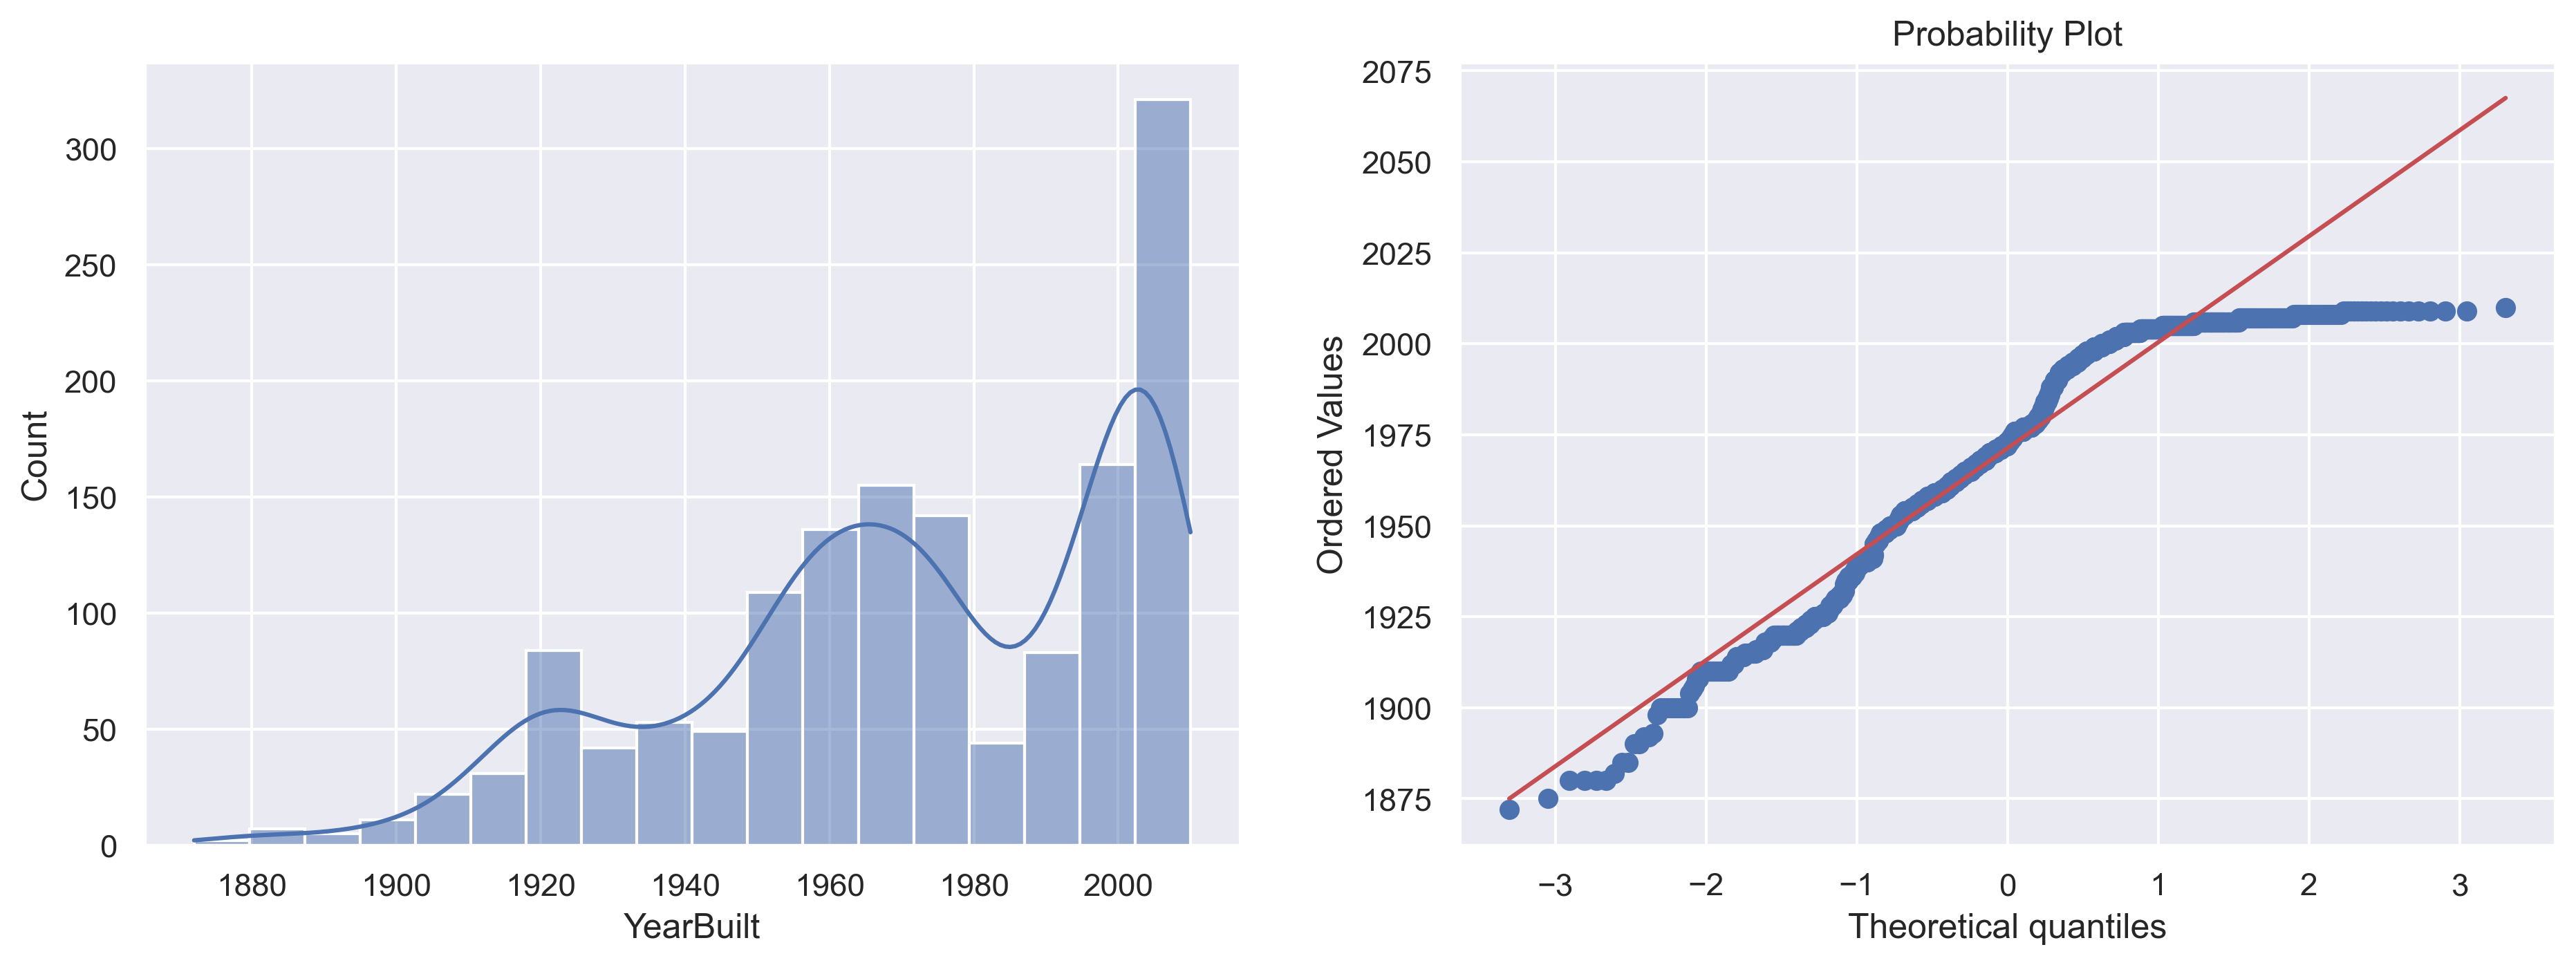

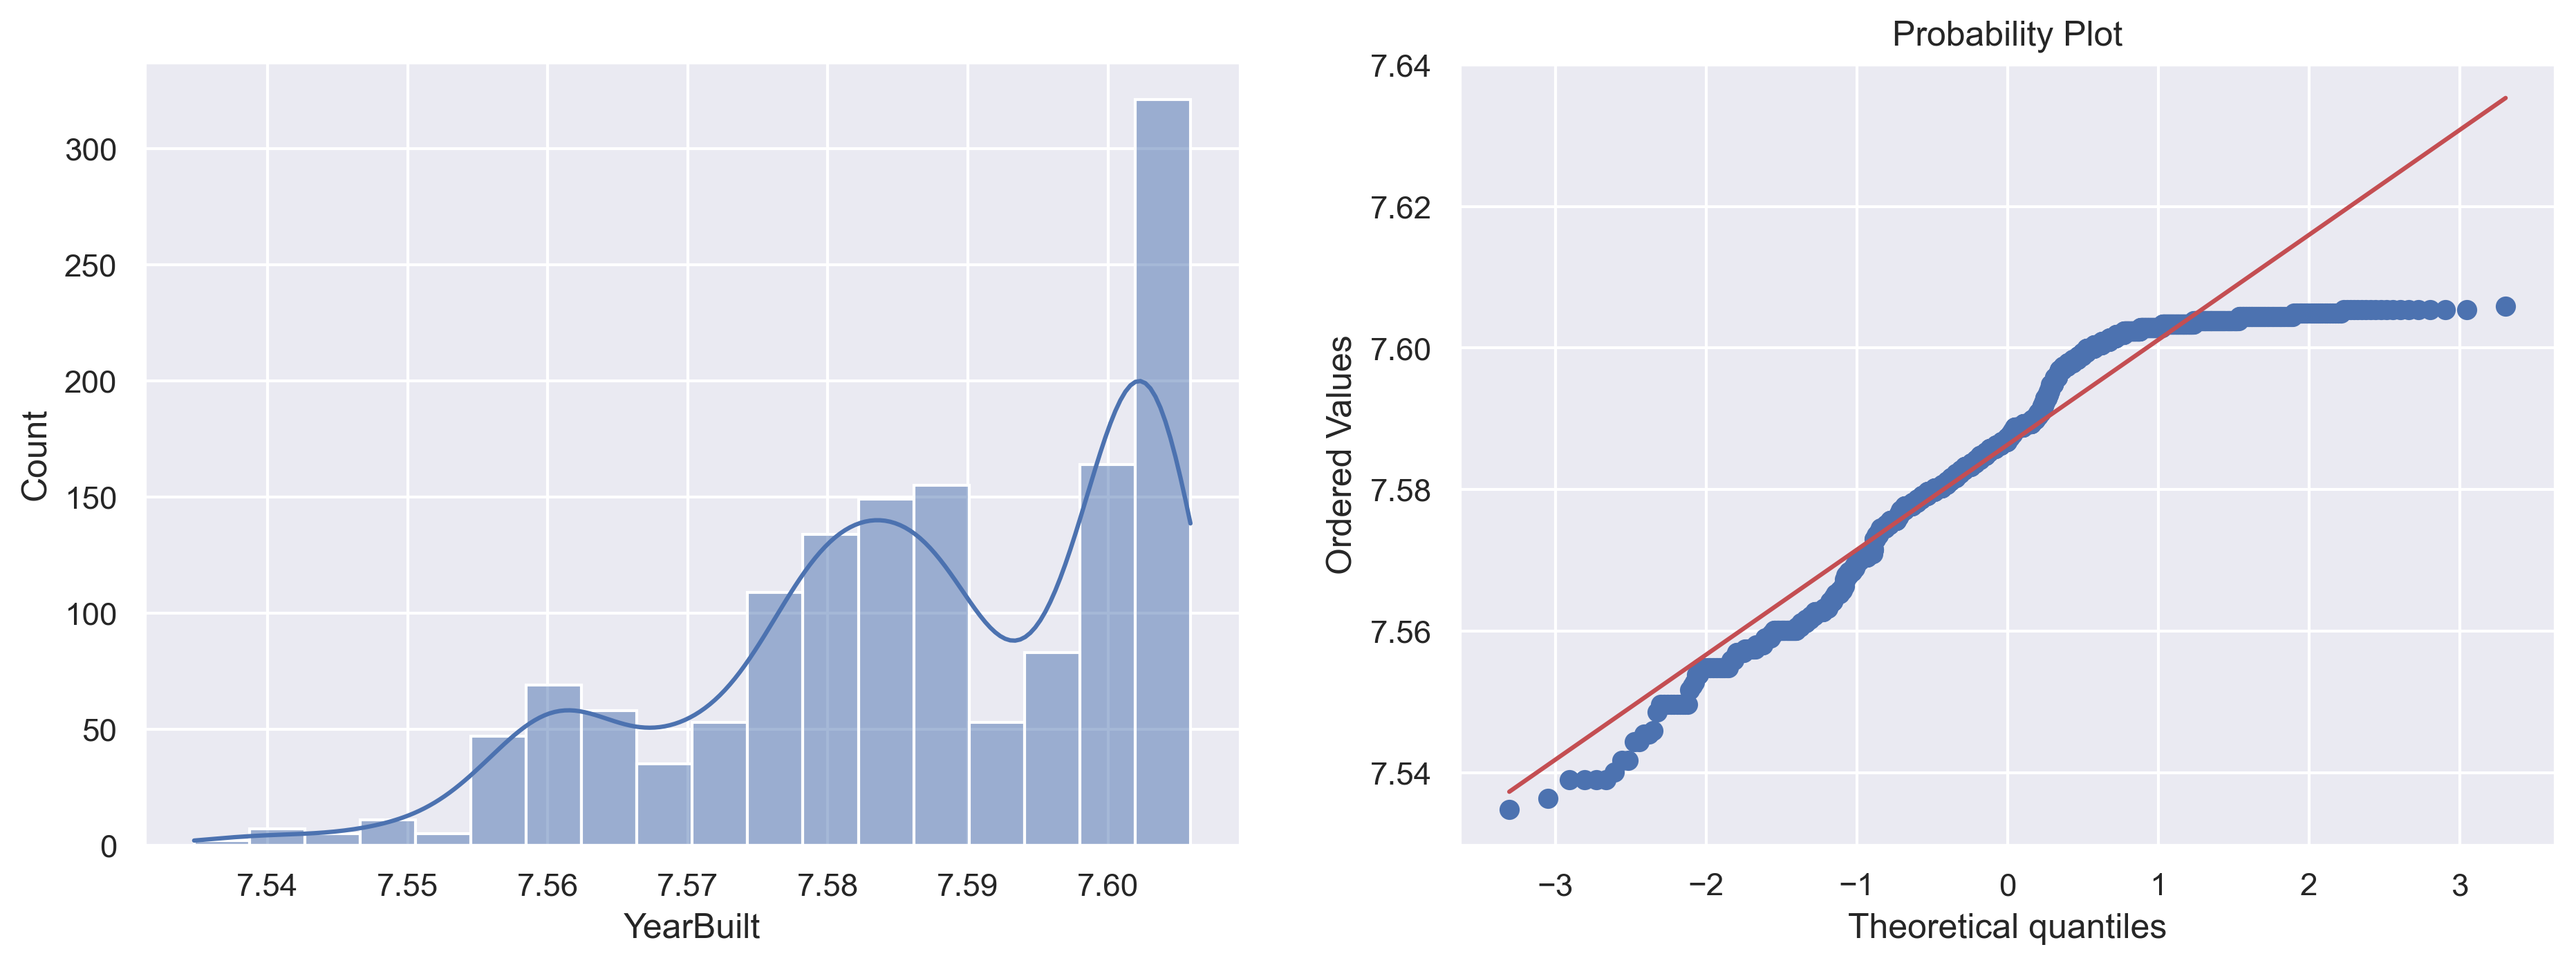

In [9]:
transformer = FunctionTransformer(np.log, validate=True)
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

### Transformacja Box-Cox

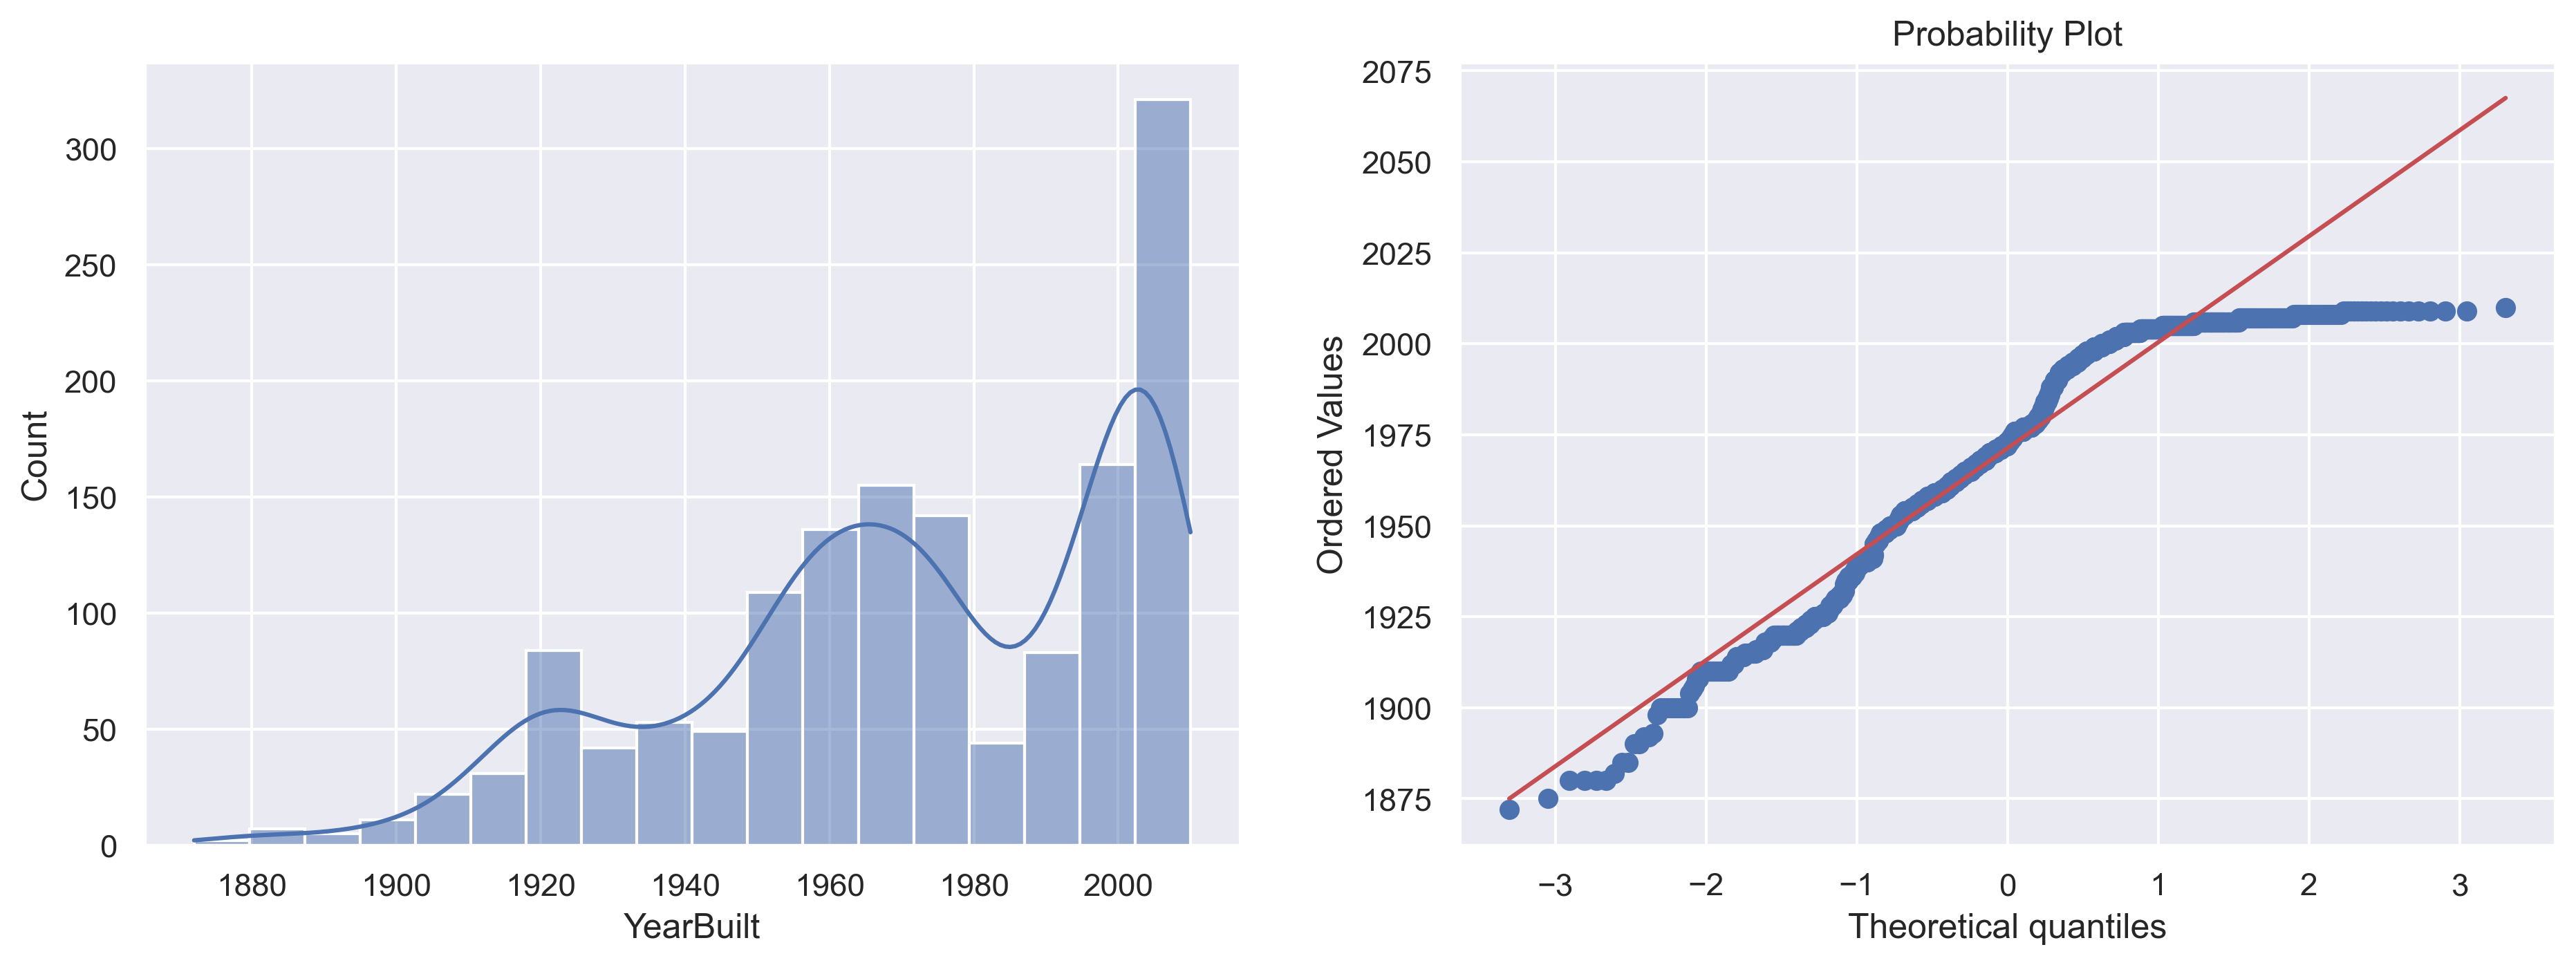

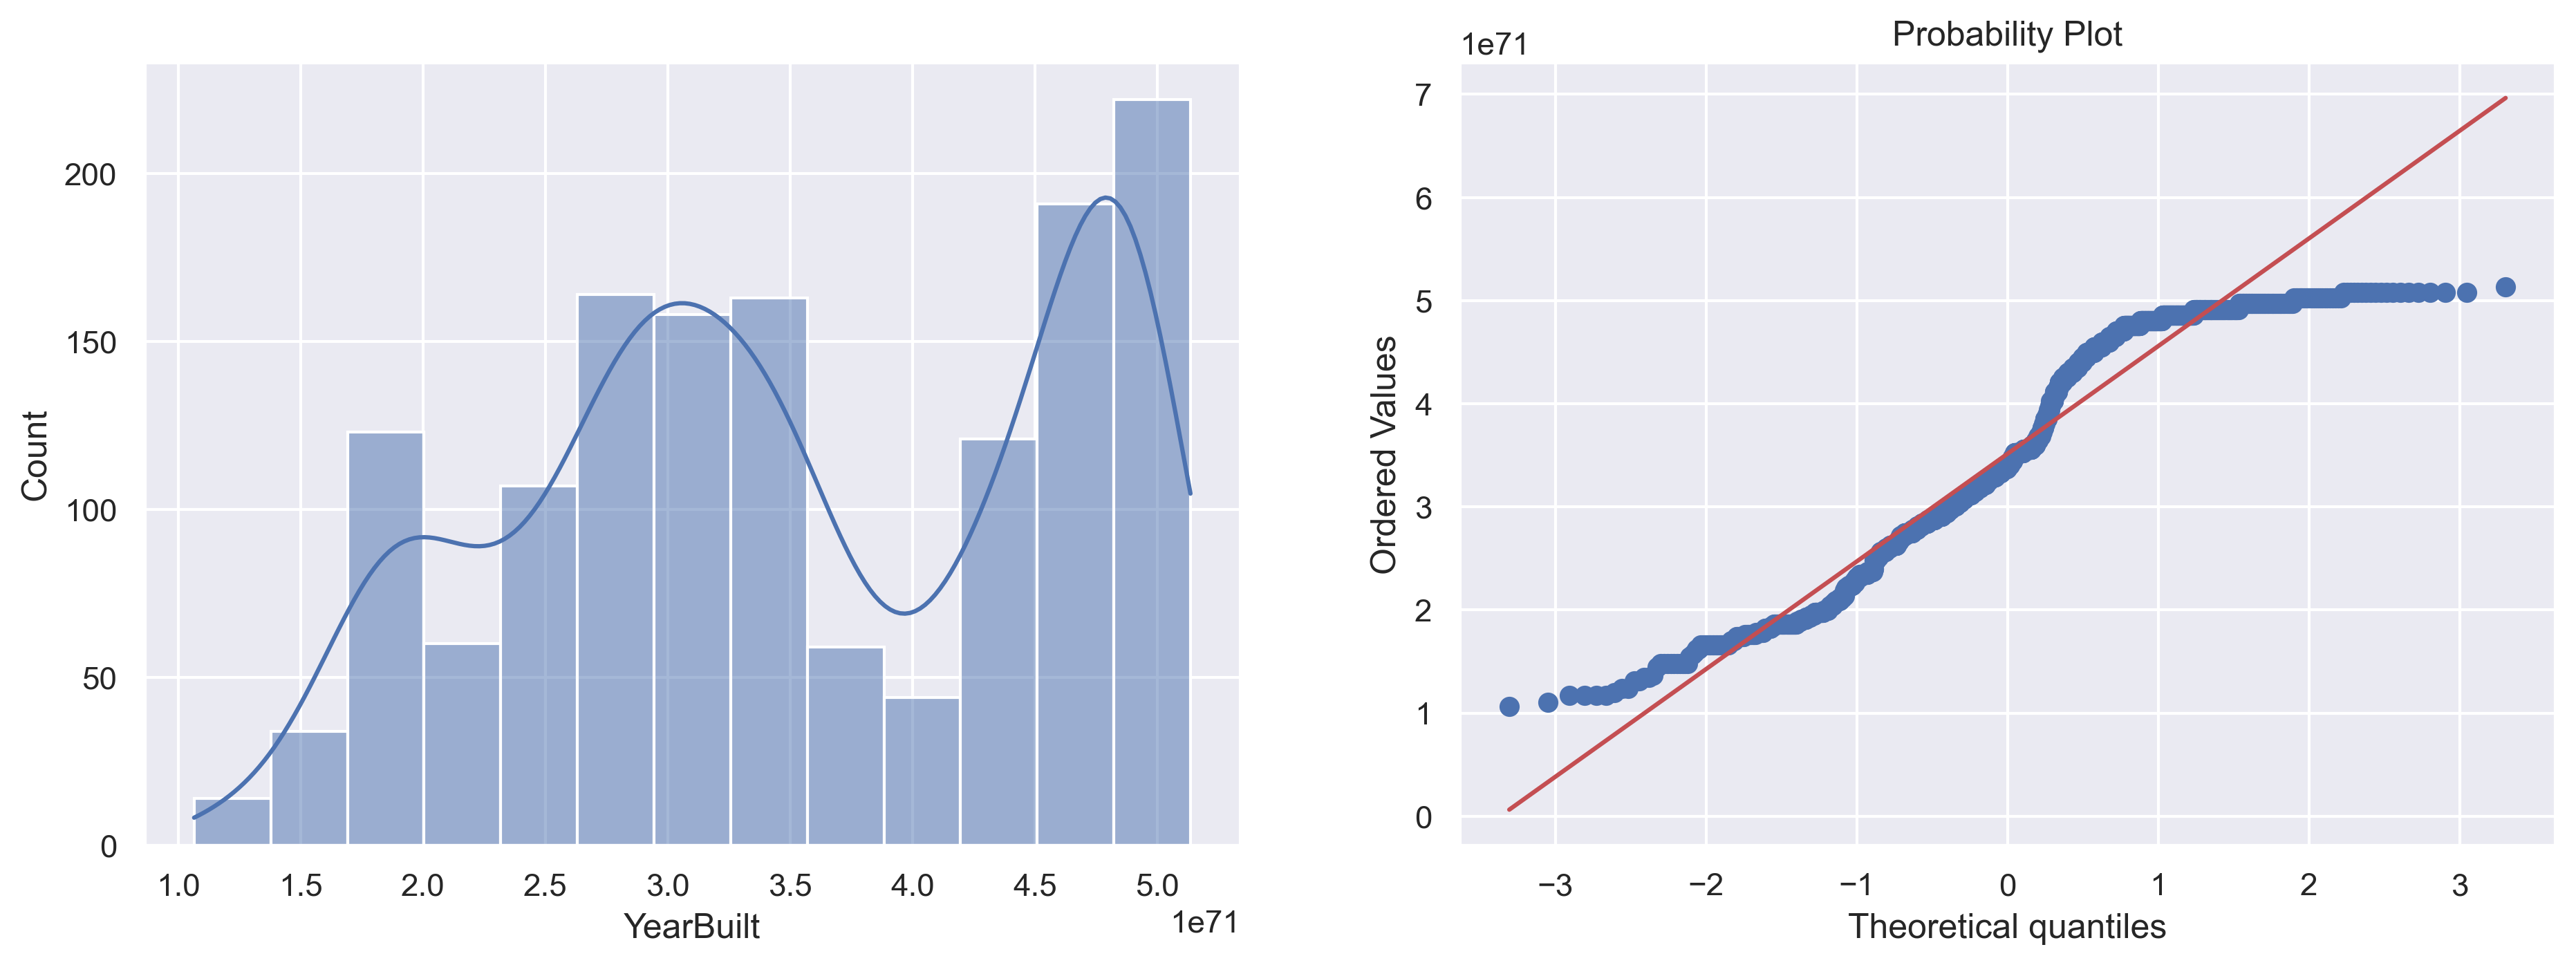

In [10]:
transformer = PowerTransformer(method='box-cox', standardize=False)
# first find the optimal lambda using the train set
transformer.fit(df[variables].fillna(1))
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

### Transformacja Yeo-Johnson

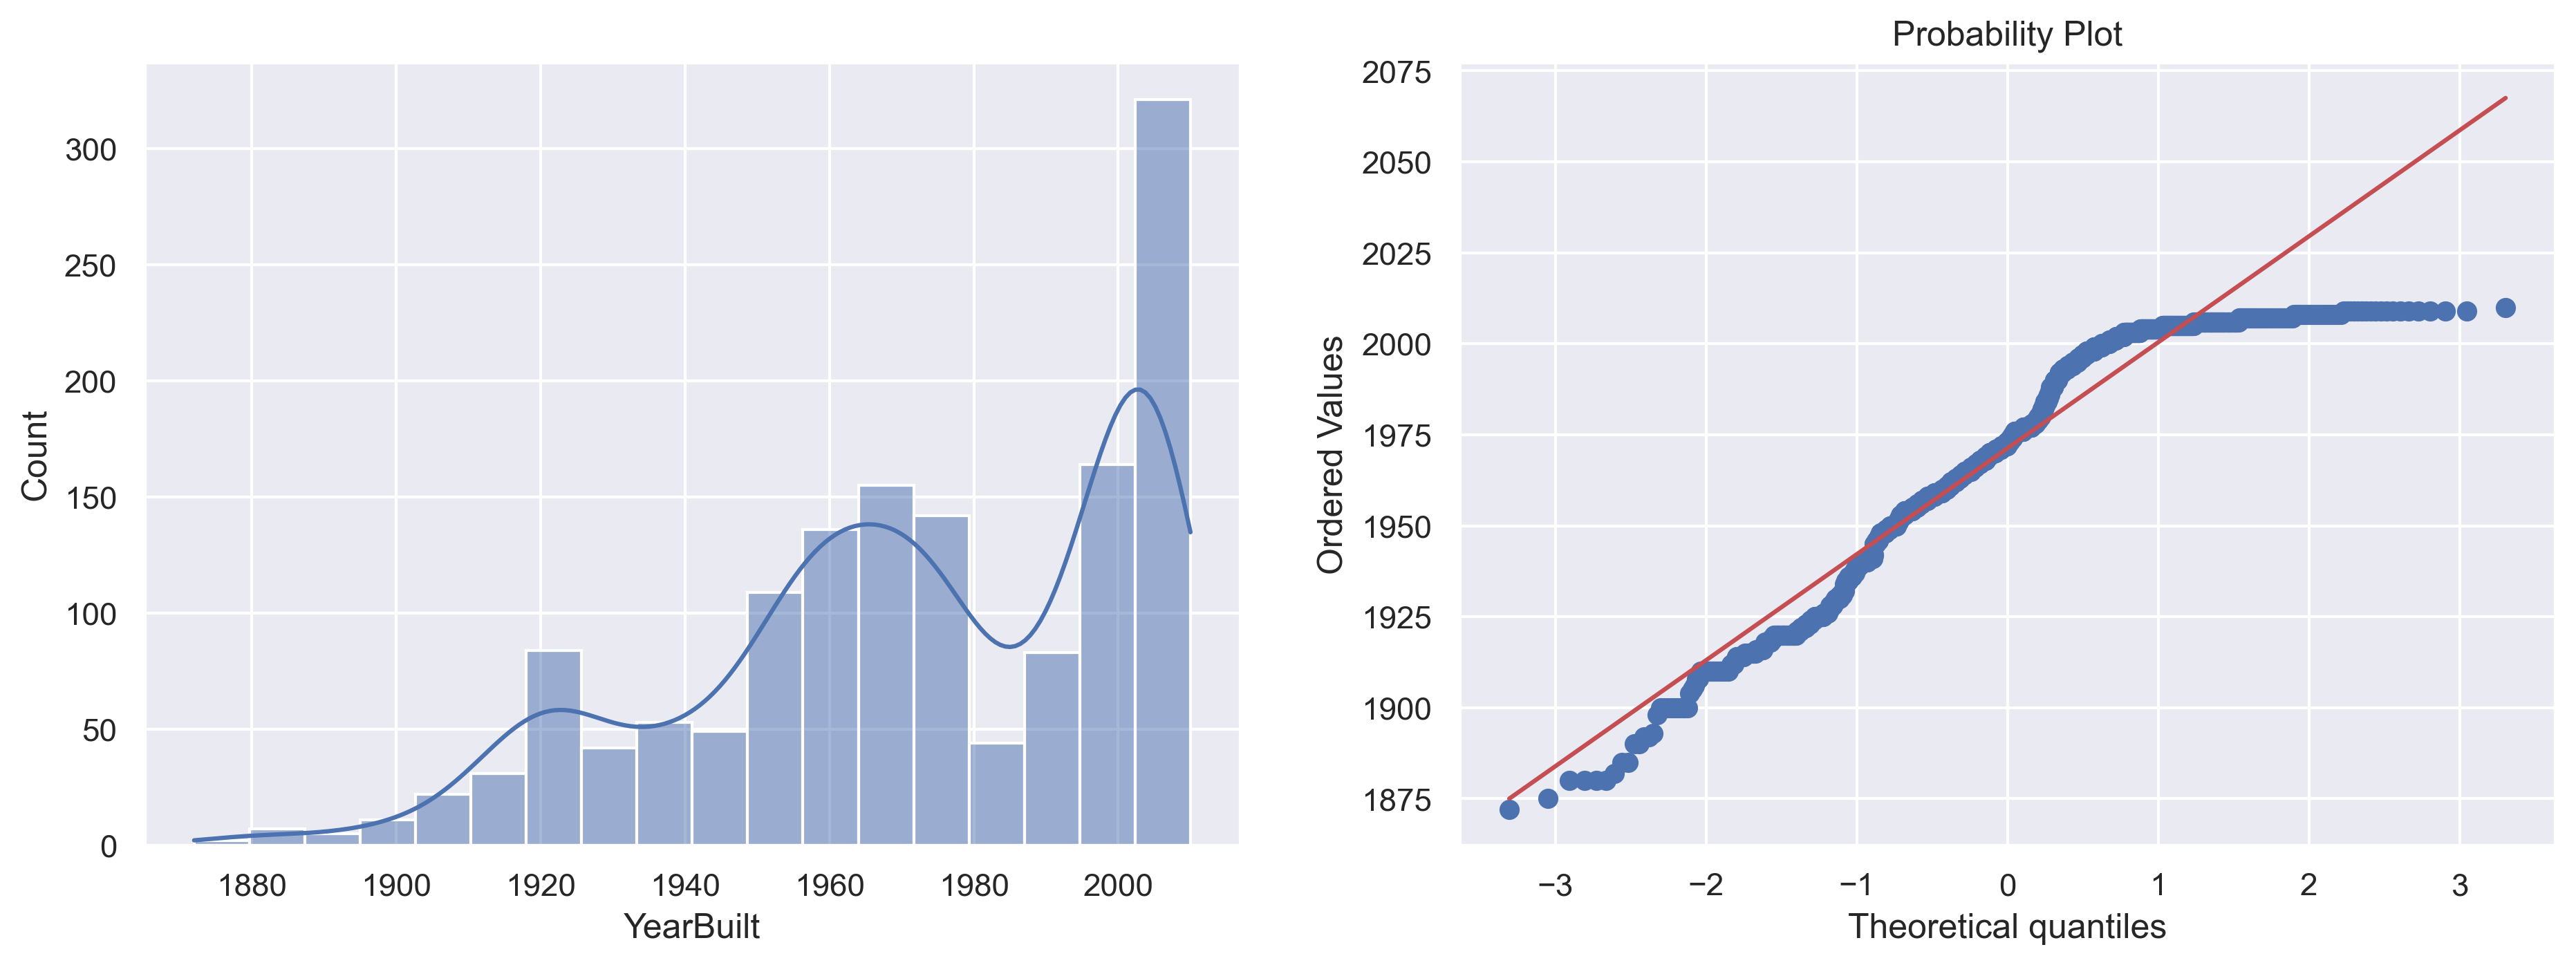

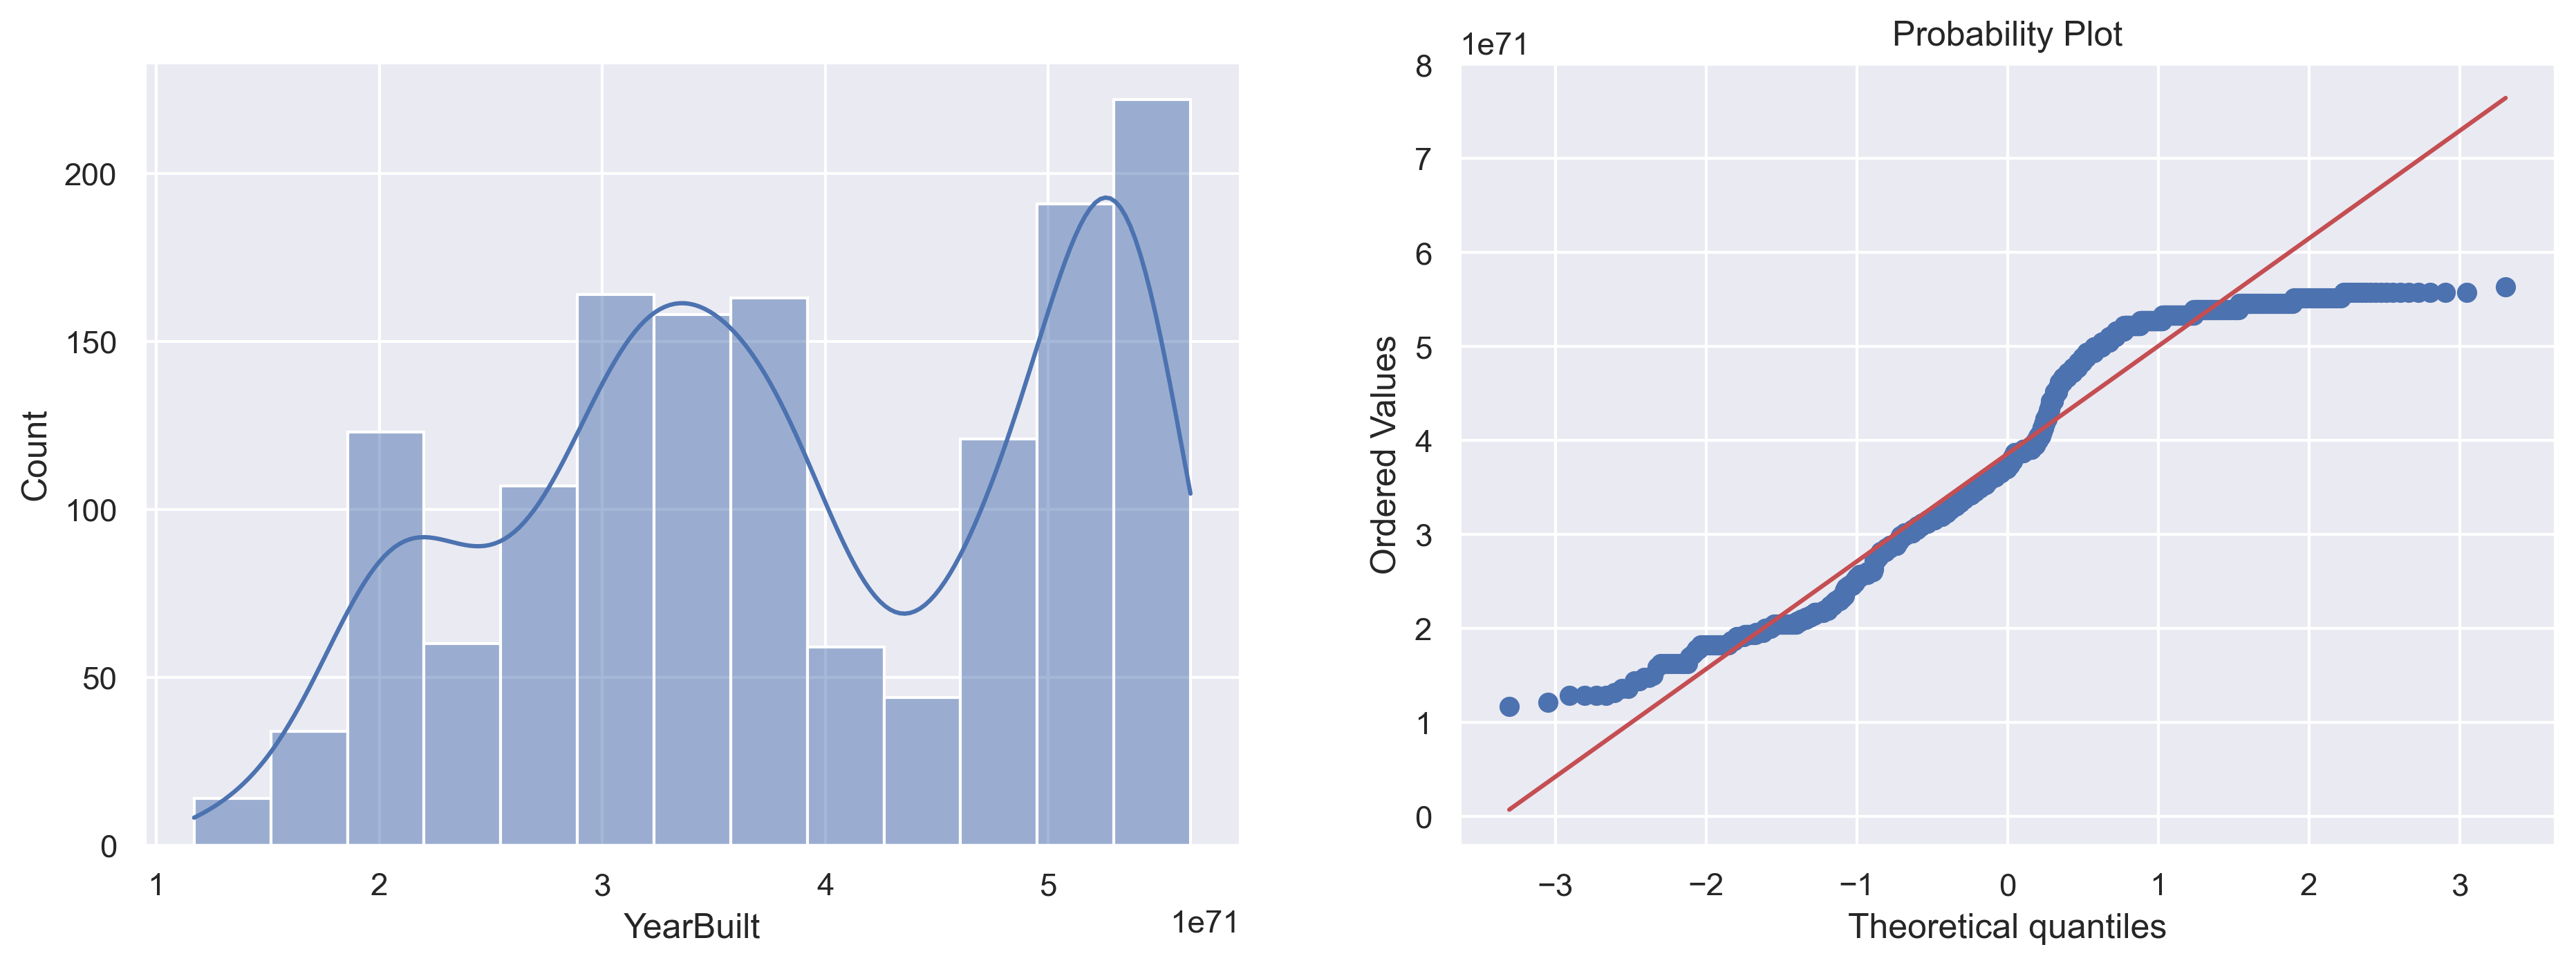

In [11]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
# first find the optimal lambda using the train set
transformer.fit(df[variables].fillna(1))
transformed_var = transformer.transform(df[variables].fillna(1))
transformed_var = pd.DataFrame(transformed_var, columns = variables)
Gaussian_distribution_check(df, "YearBuilt" )
Gaussian_distribution_check(transformed_var, "YearBuilt")

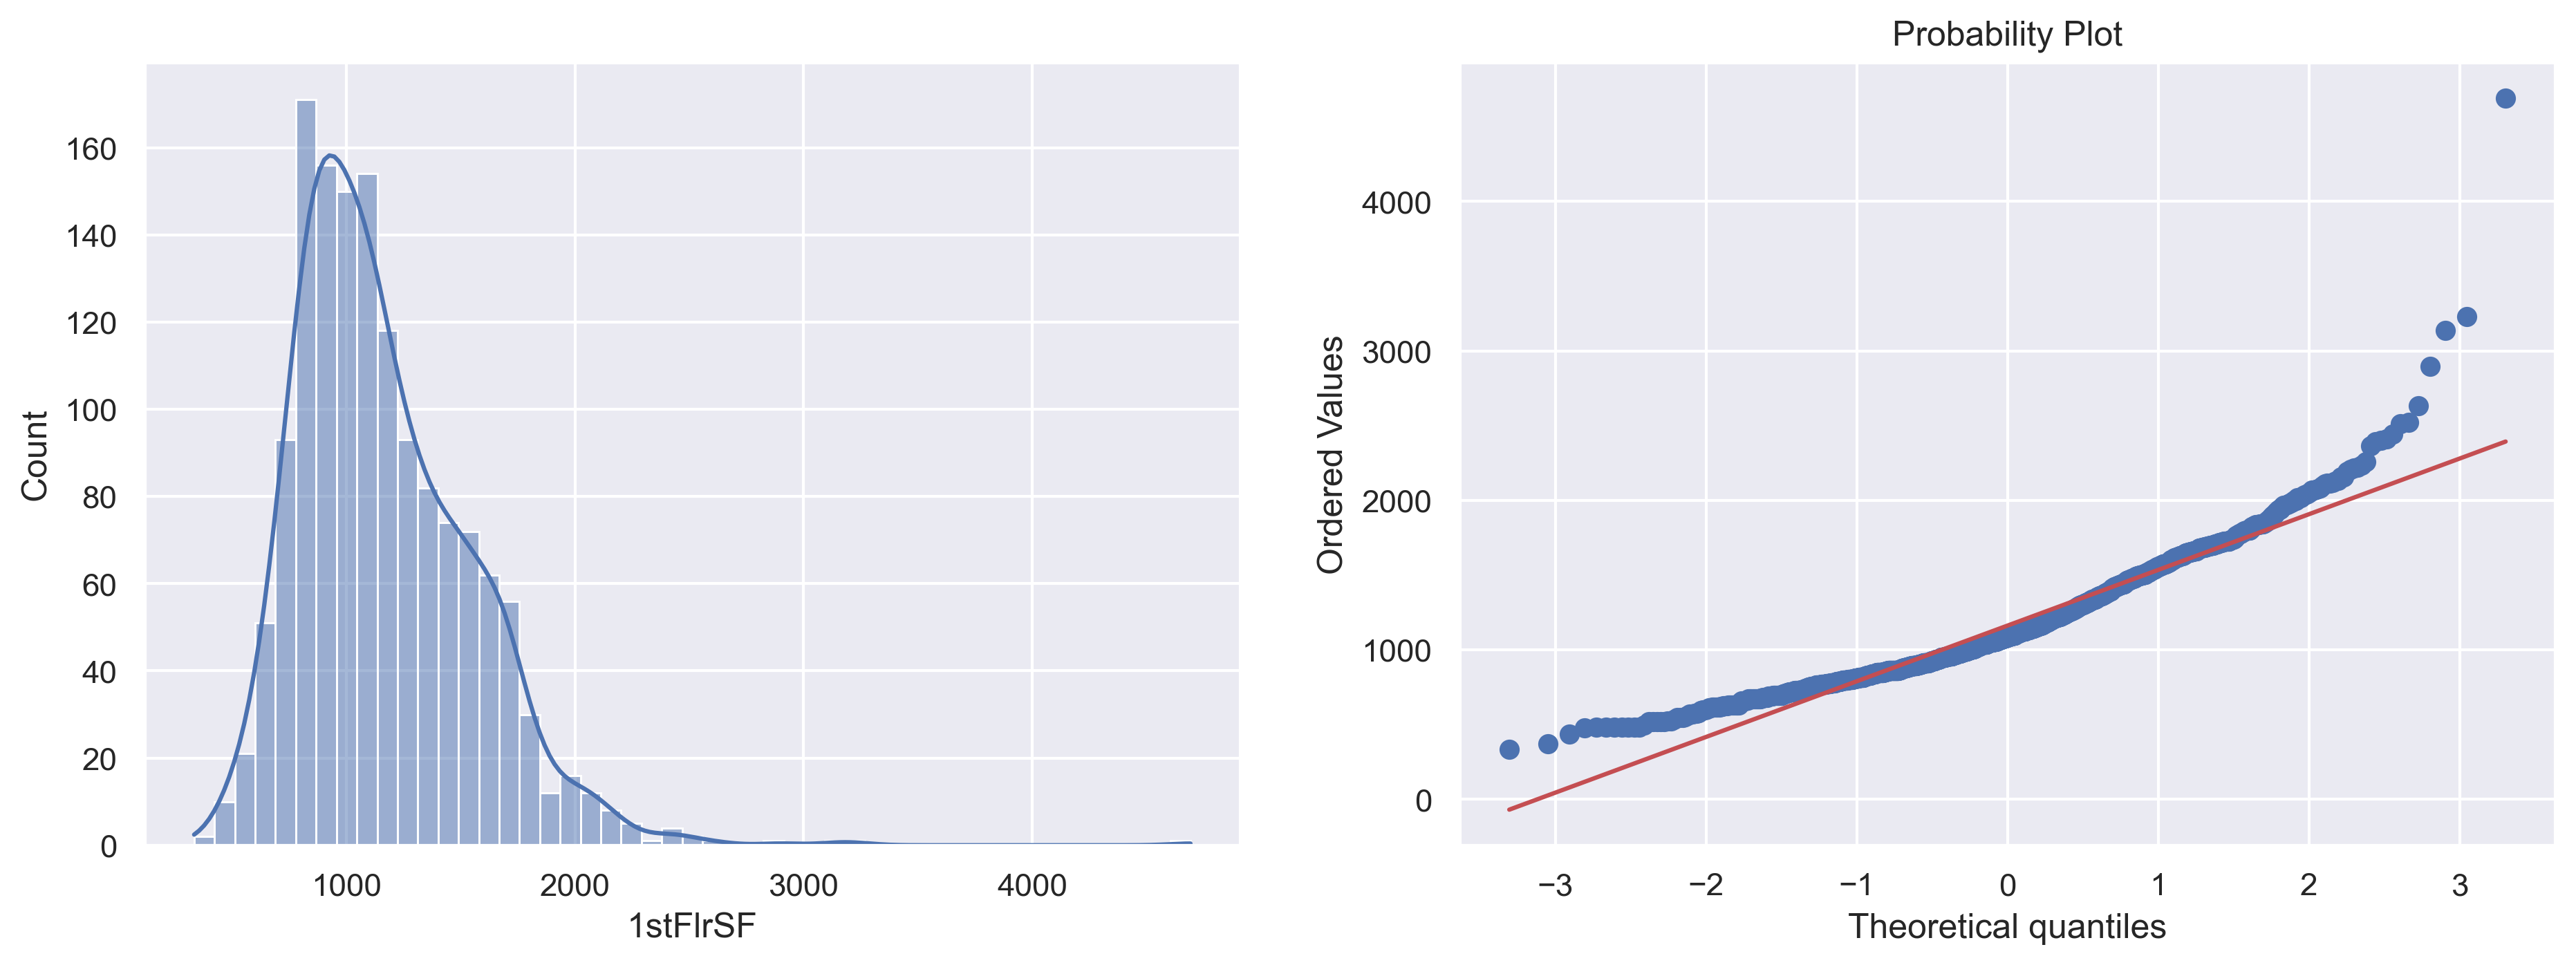

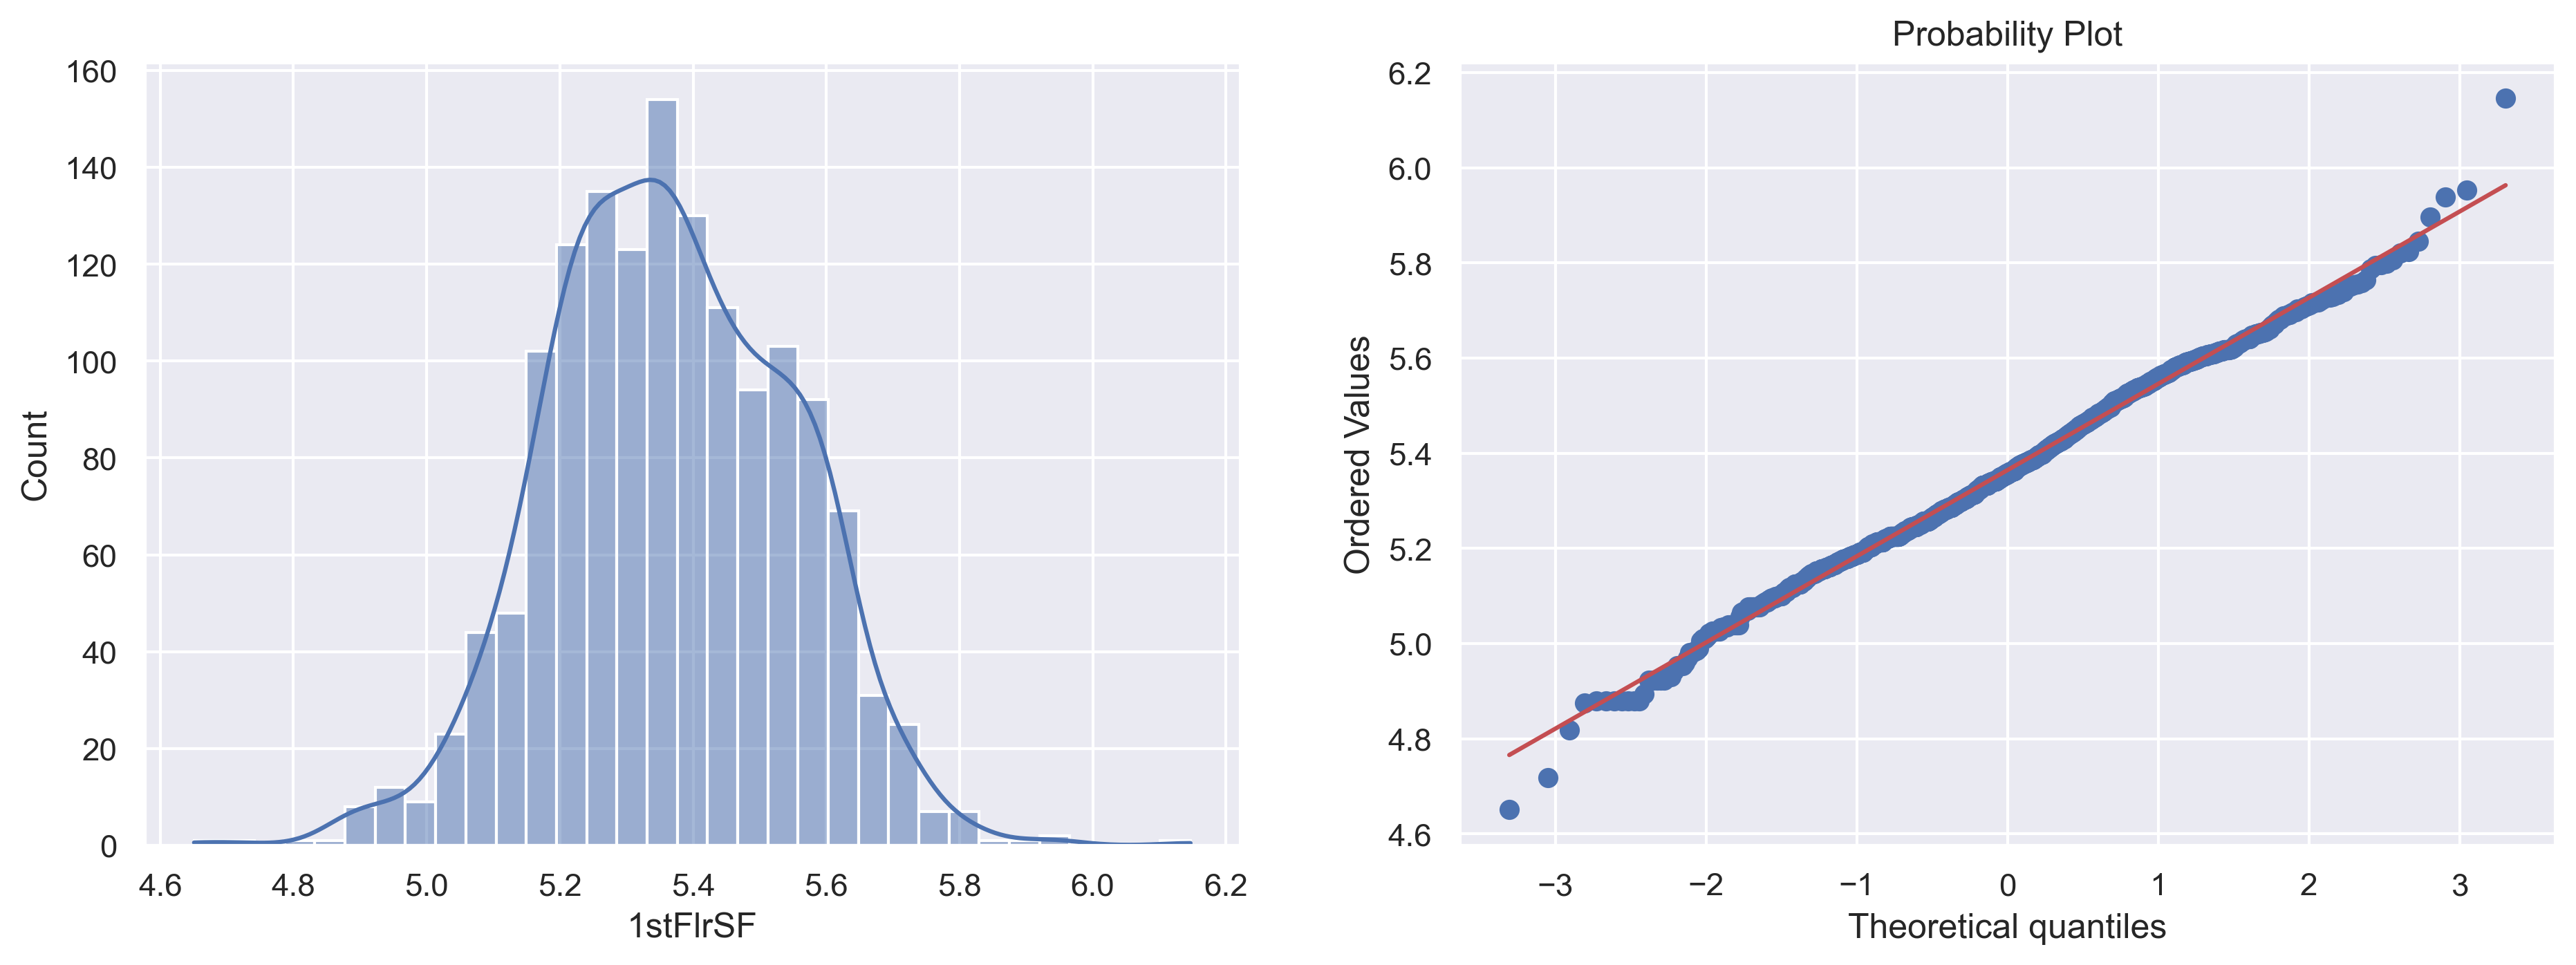

In [12]:
Gaussian_distribution_check(df, "1stFlrSF" )
Gaussian_distribution_check(transformed_var, "1stFlrSF")